<a href="https://colab.research.google.com/github/Matheus-Pombeiro/dataviz_comparison_distribution_charts/blob/main/comparison_distribution_charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparison and distribution charts

## Configurações iniciais

In [1]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

In [2]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Obtendo a url da base de dados
url = 'https://raw.githubusercontent.com/Matheus-Pombeiro/dataviz_comparison_distribution_charts/refs/heads/main/relatorio_vendas.csv'

In [4]:
# Lendo o dataset
vendas = pd.read_csv(url)

# Convertendo o tipo das datas
vendas['data_pedido'] = pd.to_datetime(vendas['data_pedido'], format='%Y-%m-%d')
vendas['data_envio'] = pd.to_datetime(vendas['data_envio'], format='%Y-%m-%d')

# Exibindo o dataframe
vendas

,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8935,2018-09-30,2018-10-04,Entrega padrão,Enrique Santos,B2C,Rio de Janeiro,Rio de Janeiro,Sudeste,Automotivo,ferramentas automotivas,97.34,123.22,0.000,123.22,1,123.22,25.88
8936,2019-11-18,2019-11-22,Entrega padrão,Heitor Silveira,B2B,Jequié,Bahia,Nordeste,Automotivo,ferramentas automotivas,223.01,271.97,0.000,271.97,1,271.97,48.96
8937,2019-11-18,2019-11-22,Entrega padrão,Heitor Silveira,B2B,Jequié,Bahia,Nordeste,Automotivo,pneus,121.23,140.15,0.000,140.15,5,700.75,94.60
8938,2016-01-22,2016-01-24,Econômica,Isabel Araújo,B2C,João Pessoa,Paraíba,Nordeste,Materiais de construção,iluminação,26.29,31.79,0.100,28.61,3,85.83,6.96


In [5]:
# Verificando os dados
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   data_pedido          8940 non-null   datetime64[ns]
 1   data_envio           8940 non-null   datetime64[ns]
 2   modo_envio           8940 non-null   object        
 3   nome_cliente         8940 non-null   object        
 4   segmento_cliente     8940 non-null   object        
 5   cidade               8940 non-null   object        
 6   estado               8940 non-null   object        
 7   regiao               8940 non-null   object        
 8   departamento         8940 non-null   object        
 9   tipo_produto         8940 non-null   object        
 10  preco_base           8940 non-null   float64       
 11  preco_unit_sem_desc  8940 non-null   float64       
 12  desconto             8940 non-null   float64       
 13  preco_unit_venda     8940 non-nul

## Comparando dados

In [6]:
# Copiando o df
df_vendas_ano = vendas.copy()

# Selecionando colunas
df_vendas_ano = df_vendas_ano[['data_pedido', 'vendas']]

# Extraindo o ano
df_vendas_ano['ano'] = df_vendas_ano.data_pedido.dt.year

# Removendo uma coluna
df_vendas_ano.drop(labels='data_pedido', axis=1, inplace=True)

# Agrupando os dados por ano
df_vendas_ano = df_vendas_ano.groupby('ano')['vendas'].sum()

# Exibindo o df
df_vendas_ano

,vendas
ano,
2016,1402652.33
2017,1489179.52
2018,1884161.41
2019,2305006.29


In [7]:
# Resetando o index
df_vendas_ano = df_vendas_ano.reset_index()

# Convertendo em um df
df_vendas_ano.columns = ['Ano', 'Vendas']

# Exibindo o df
df_vendas_ano

,Ano,Vendas
0,2016,1402652.33
1,2017,1489179.52
2,2018,1884161.41
3,2019,2305006.29


<ipython-input-8-30530b2ba9af>:11: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=df_vendas_ano, x='Ano', y='Vendas', palette=cores, hue='Vendas', legend=False)


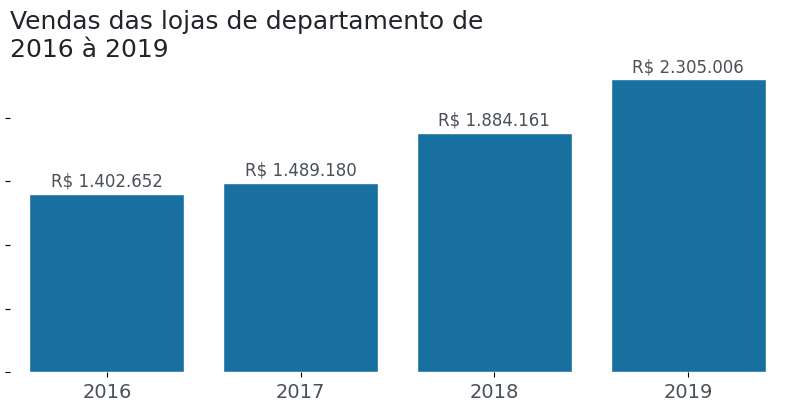

In [8]:
# Definindo uma função para plottar gráficos de colunas
def grafico_vendas(cores: list=[AZUL2]):

  # Gerando uma figura
  fig, ax = plt.subplots(figsize=(10, 4))

  # Configurando o tema
  sns.set_theme(style='white')

  # Plottando um gráfico de colunas
  ax = sns.barplot(data=df_vendas_ano, x='Ano', y='Vendas', palette=cores, hue='Vendas', legend=False)

  # Adicionando um título
  ax.set_title('Vendas das lojas de departamento de\n2016 à 2019', loc='left', fontsize=18, color=CINZA1)

  # Removendo os labels
  ax.set_xlabel('')
  ax.set_ylabel('')

  # Aumentando os rótulos
  ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)

  # Removendo bordas
  sns.despine(left=True, bottom=True)

  # Limpando os labels do eixo y
  ax.set_yticklabels([])

  # Escrevendo os valores de cada barra no gráfico
  for i, valor in enumerate(df_vendas_ano['Vendas']):
    qtd = f'R$ {valor:,.0f}'.replace(',', '.')
    offset = 1e5
    ax.text(i, valor + offset, qtd, color=CINZA2, fontsize=12, ha='center', va='center')

  # Retornando o eixo
  return ax

# Chamando a função
ax = grafico_vendas()

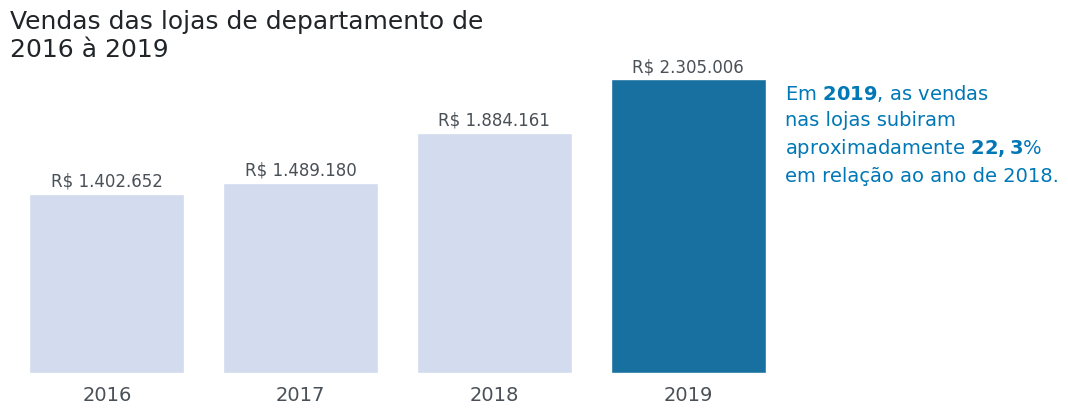

In [9]:
# Definindo cores para o gráfico
cores = []
for ano in df_vendas_ano.index:
  if df_vendas_ano.loc[ano, 'Vendas'] == df_vendas_ano.Vendas.max():
    cores.append(AZUL2)
  else:
    cores.append(AZUL5)

# Chamando a função
ax = grafico_vendas(cores)

# Anotando uma conclusão no gráfico
ax.text(3.5, 1.5e6,
         'Em $\\bf{2019}$, as vendas\n'
         'nas lojas subiram\n'
         'aproximadamente $\\bf{22,3}$%\n'
         'em relação ao ano de 2018.',
         fontsize=14, linespacing=1.45, color=AZUL2)

# Obtendo a figura
fig = ax.get_figure()

In [10]:
# Copiando o df
top_lucro = vendas.copy()

# Selecionando os dados
top_lucro = top_lucro[['tipo_produto', 'lucro']]

# Agrupando os dados por tipo de produto
top_lucro = top_lucro.groupby('tipo_produto')['lucro'].sum().sort_values(ascending=False)

# Obtento apenas o top 7
top_7 = top_lucro.head(7)

# Exibindo o df
top_7

,lucro
tipo_produto,
peças de reposição,91148.67
pneus,67460.05
ferramentas automotivas,63330.22
pesticidas,53343.89
ferramentas de jardinagem,53202.88
ferramentas,41020.34
vasos,33941.85


In [11]:
# Resetando o index
top_7 = top_7.reset_index()

# Convertendo para um df
top_7.columns = ['tipo_produto', 'lucro']

# Exibindo o df
top_7

,tipo_produto,lucro
0,peças de reposição,91148.67
1,pneus,67460.05
2,ferramentas automotivas,63330.22
3,pesticidas,53343.89
4,ferramentas de jardinagem,53202.88
5,ferramentas,41020.34
6,vasos,33941.85


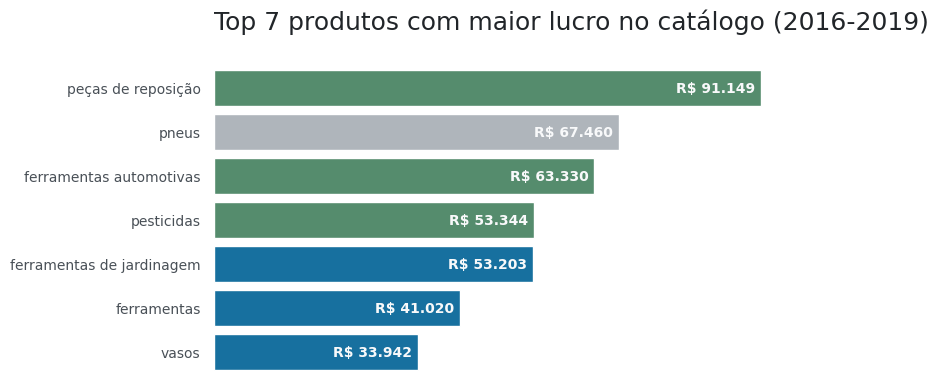

In [12]:
# Definindo uma função para plottar gráficos de colunas
def grafico_top_7(cores: list=[AZUL2]):

  # Gerando uma figura
  fig, ax = plt.subplots(figsize=(10, 4))

  # Liberando espaço à direita da figura para o texto
  fig.subplots_adjust(right=0.7)

  # Configurando o tema
  sns.set_theme(style='white')

  # Definindo as cores do gráfico
  cores = [AZUL2, AZUL2, AZUL2, VERDE1, VERDE1, CINZA3, VERDE1]

  # Plottando um gráfico de colunas
  ax = sns.barplot(data=top_7, x='lucro', y='tipo_produto', palette=cores, hue='lucro', legend=False)

  # Personalizando o gráfico
  ax.set_title('Top 7 produtos com maior lucro no catálogo (2016-2019)\n', fontsize=18, color=CINZA1, loc='left')
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_xticklabels([])
  ax.yaxis.set_tick_params(labelsize=10, labelcolor = CINZA2)
  sns.despine(left = True, bottom = True)

  # Escrevendo os valores de cada barra no gráfico
  for i, valor in enumerate(top_7['lucro']):
    qtd =f'R$ {valor:,.0f}'.replace(',', '.')
    offset = 1e3  # Offset de 1.000
    ax.text(valor - offset, i, qtd, color=CINZA5, fontsize=10, fontweight='bold', ha='right', va='center')

  # Retornando o eixo
  return ax

# Chamando a função
ax = grafico_top_7()

In [13]:
# Colorindo o texto
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

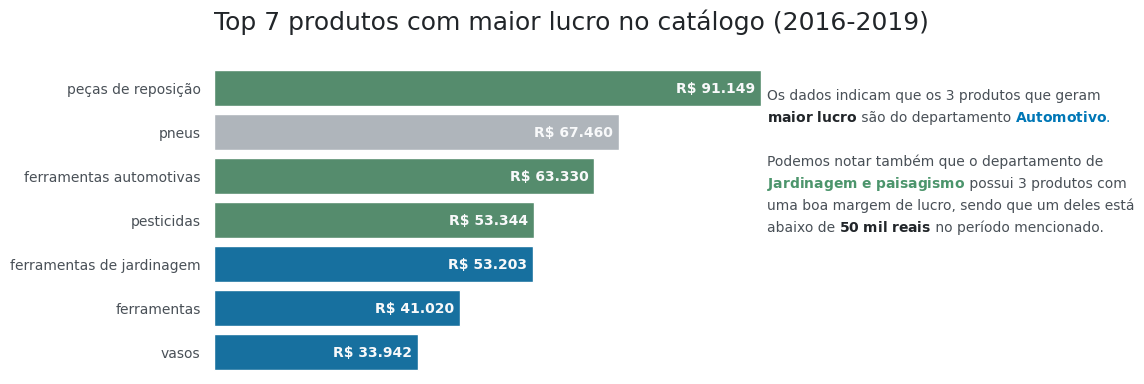

In [14]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Chamando a função do gráfico de barras
ax = grafico_top_7()

# Anotando uma conclusão no gráfico
texto_colorido(
    9.2e4, 3.25,                                                       			 # coordenadas
    'Os dados indicam que os 3 produtos que geram\n'                    # texto
    '$\\bf{maior\ lucro}$|| são do departamento ||$\\bf{Automotivo}$.\n'
    '\n'
    'Podemos notar também que o departamento de\n'
    '$\\bf{Jardinagem\ e\ paisagismo}$|| possui 3 produtos com\n'
    'uma boa margem de lucro, sendo que um deles está\n'
    'abaixo de ||$\\bf{50\ mil\ reais}$|| no período mencionado.',
    [[CINZA2],                       	           # linha 1                         		 # cores
     [CINZA1, CINZA2, AZUL2],         # linha 2
     [CINZA2],                                     # linha 3
     [CINZA2],                       	          # linha 4
     [VERDE1, CINZA2],                   # linha 5
     [CINZA2],                                    # linha 6
     [CINZA2, CINZA1, CINZA2]        # linha 7
    ],
    esp=22,				 # espaçamento
    ax=ax,				 # figura onde desenhar o texto
    fontsize=10)

fig = ax.get_figure()

## Aula 1 - desafio

In [15]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

In [16]:
# Criando um df com os dados desejados
df_lucro_ano = vendas.copy()
df_lucro_ano = df_lucro_ano[["data_pedido", "lucro"]]

# Gerando uma coluna que represente apenas os anos puxando-os da coluna data pedido
df_lucro_ano["ano"] = df_lucro_ano.data_pedido.dt.year
df_lucro_ano.drop(labels = "data_pedido", axis = 1, inplace=True)

# Agrupando os dados por ano
df_lucro_ano = df_lucro_ano.groupby(["ano"]).aggregate("sum")

df_lucro_ano

,lucro
ano,
2016,75033.63
2017,101265.15
2018,129862.44
2019,148097.30


In [17]:
# Resetando o index
df_lucro_ano = df_lucro_ano.reset_index()

# Convertendo para df
df_lucro_ano.columns = ['ano', 'lucro']

# Exibindo o df
df_lucro_ano

,ano,lucro
0,2016,75033.63
1,2017,101265.15
2,2018,129862.44
3,2019,148097.30


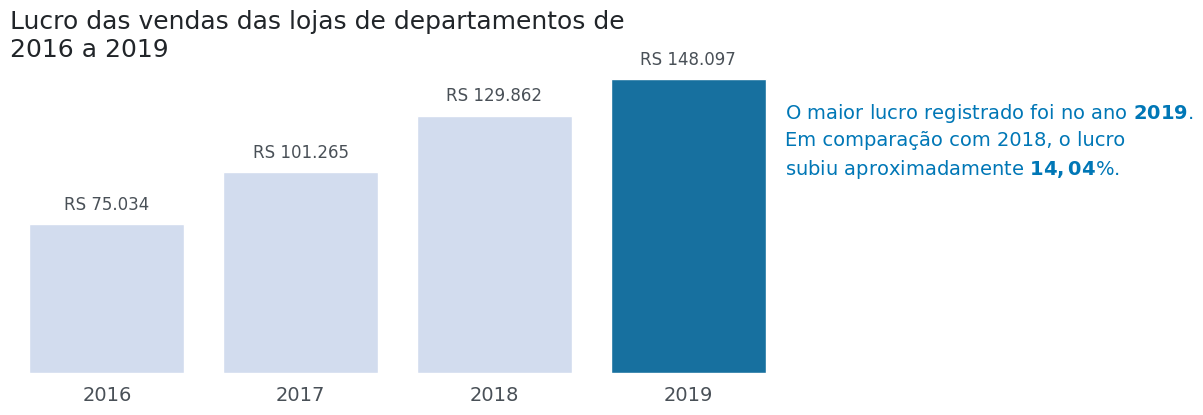

In [18]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(10,4))
sns.set_theme(style="white")

# Definindo as cores
cores = []
for ano in df_lucro_ano.index:
  if df_lucro_ano.loc[ano, 'lucro'] == df_lucro_ano['lucro'].max():
    cores.append(AZUL2)
  else:
    cores.append(AZUL5)

# Gerando o gráfico de colunas
ax = sns.barplot(data = df_lucro_ano, x ='ano',
                 y="lucro", palette = cores,
                 hue='lucro', legend=False)

# Personalizando o gráfico
ax.set_title("Lucro das vendas das lojas de departamentos de\n2016 a 2019",
             loc="left", fontsize = 18, color = CINZA1)
ax.set_xlabel("")
ax.set_ylabel("")
ax.xaxis.set_tick_params(labelsize = 14, labelcolor= CINZA2)
sns.despine(left= True, bottom = True)

# Escrevendo os valores de cada barra no gráfico
ax.set_yticklabels([])
for i, valor in enumerate(df_lucro_ano['lucro']):
  qtd = f'RS {valor:,.0f}'.replace(',', '.')
  offset = 1e4
  ax.text(i, valor + offset, qtd, color=CINZA2, fontsize=12, ha='center', va='center')

# Anotando uma conclusão no gráfico
ax.text(3.5, 1e5,
        'O maior lucro registrado foi no ano $\\bf{2019}$.\n'
         'Em comparação com 2018, o lucro\n'
         'subiu aproximadamente $\\bf{14,04}$%.',
        fontsize=14, linespacing=1.45, color=AZUL2)

# Exibindo o gráfico
plt.show()

In [19]:
# Criando um df com os dados desejados
fat_produto = vendas.copy()
fat_produto = fat_produto[["tipo_produto", "vendas"]]

# Agrupando os dados por tipo_produto, ordenando de maneira decrescente pelas vendas e selecionando os 10 primeiros
fat_produto = fat_produto.groupby(["tipo_produto"]).agg("sum").sort_values("vendas", ascending = False)
top_10 = fat_produto[:10]
top_10

,vendas
tipo_produto,
pneus,1022428.97
ferramentas,995158.41
vasos,696044.18
ferramentas de jardinagem,648879.72
materiais de revestimento,629656.36
equipamentos de limpeza,542304.58
ferramentas automotivas,502109.29
peças de reposição,486907.94
encanamentos,373223.88


In [20]:
# Resetando o index
top_10 = top_10.reset_index()

# convertendo em df
top_10.columns = ['tipo_produto', 'vendas']

# Exibindo o df
top_10

,tipo_produto,vendas
0,pneus,1022428.97
1,ferramentas,995158.41
2,vasos,696044.18
3,ferramentas de jardinagem,648879.72
4,materiais de revestimento,629656.36
5,equipamentos de limpeza,542304.58
6,ferramentas automotivas,502109.29
7,peças de reposição,486907.94
8,encanamentos,373223.88
9,mobiliário de exterior,328932.27


In [21]:
# Código para gerar o texto colorido

from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

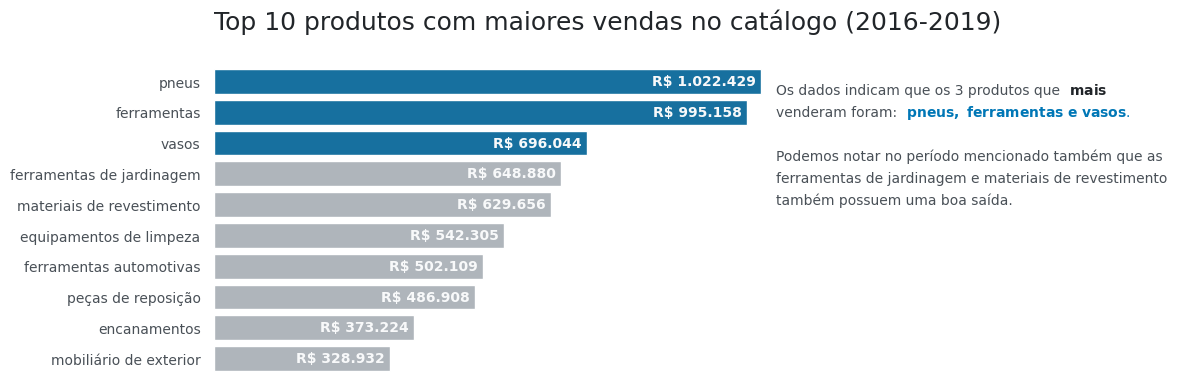

In [22]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(10,4))
fig.subplots_adjust(right=0.7)
sns.set_theme(style="white")

# Definindo as cores do gráfico: 3 primeiro em azul e restante em cinza
cores = [AZUL2 if i < 3 else CINZA3 for i in range(10)]

# Gerando o gráfico de barras
ax = sns.barplot(data = top_10, x="vendas", y ='tipo_produto', palette = cores, hue='tipo_produto')

# Personalizando o gráfico
ax.set_title('Top 10 produtos com maiores vendas no catálogo (2016-2019)\n', fontsize=18, color=CINZA1, loc='left')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.yaxis.set_tick_params(labelsize=10, labelcolor = CINZA2)
sns.despine(left = True, bottom = True)

# Escrevendo os valores de cada barra no gráfico
for i, valor in enumerate(top_10['vendas']):
    qtd = f'R$ {valor:,.0f}'.replace(',','.')
    offset = 1e4  # offset de 10.000
    ax.text(valor - offset, i, qtd, color= CINZA5, fontsize=10, fontweight='bold', ha='right', va='center')

# Gerando o texto colorido
texto_colorido(
    1.05e6, 4,                                                      # coordenadas
    'Os dados indicam que os 3 produtos que || $\\bf{mais}$\n'     # texto
    'venderam foram: || $\\bf{pneus,\ ferramentas\ e\ vasos}$.\n'
    '\n'
    'Podemos notar no período mencionado também que as\n'
    'ferramentas de jardinagem e materiais de revestimento\n'
    'também possuem uma boa saída.',
    [[CINZA2, CINZA1],                # linha 1                     # cores
     [CINZA2, AZUL2],                 # linha 2
     [CINZA2],                        # linha 3
     [CINZA2],                        # linha 4
     [CINZA2],                        # linha 6
     [CINZA2]
    ],
    esp=22,         # espaçamento
    ax=ax,          # figura onde desenhar o texto
    fontsize=10)

# Exibindo o gráfico
plt.show()

## Agrupando dados

In [23]:
# Criando um df com os dados desejados
df_vendas_reg = vendas.copy()
df_vendas_reg = df_vendas_reg[['data_pedido','regiao', 'vendas']]

# Gerando uma coluna que represente apenas os anos puxando-os da coluna data pedido
df_vendas_reg['ano'] = df_vendas_reg.data_pedido.dt.year
df_vendas_reg.drop(labels = "data_pedido", axis = 1, inplace = True)

df_vendas_reg

,regiao,vendas,ano
0,Sudeste,890.66,2018
1,Sudeste,2488.59,2018
2,Sudeste,49.72,2018
3,Sul,3255.75,2017
4,Sul,76.04,2017
...,...,...,...
8935,Sudeste,123.22,2018
8936,Nordeste,271.97,2019
8937,Nordeste,700.75,2019
8938,Nordeste,85.83,2016


In [24]:
# Cruzando dados em um df
vendas_reg = pd.crosstab(index=df_vendas_reg['ano'], columns=df_vendas_reg['regiao'],
                         values=df_vendas_reg['vendas'], aggfunc='sum')

# Ajustando a tabela em ordem descrescente dos estados que mais executam vendas
vendas_reg = vendas_reg[["Sudeste", "Nordeste", "Centro-Oeste", "Norte", "Sul"]]
vendas_reg

regiao,Sudeste,Nordeste,Centro-Oeste,Norte,Sul
ano,,,,,
2016,739602.18,378521.83,121653.63,101580.57,61294.12
2017,803005.61,320804.28,149215.00,124164.47,91990.16
2018,1033836.21,401365.77,208068.71,108710.09,132180.63
2019,1146764.08,600738.87,257781.18,170311.34,129410.82


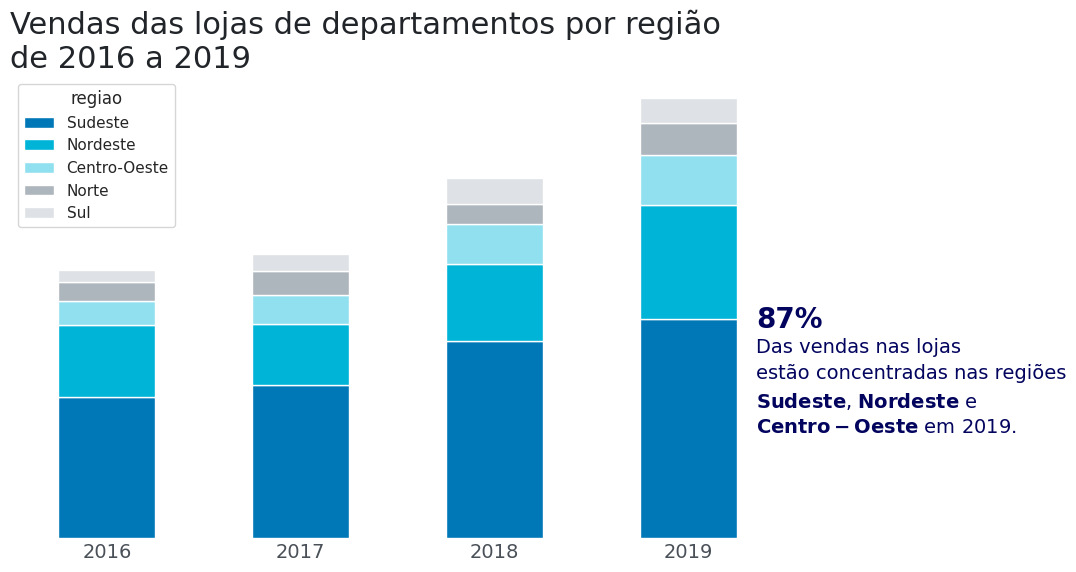

In [25]:
## Gerando a função para criar o gráfico de barras
def grafico_vendas_regiao():

  # Definindo as cores do gráfico
  cores = [AZUL2, AZUL3, AZUL4, CINZA3, CINZA4]

  # Gerando o gráfico de barras empilhadas
  ax = vendas_reg.plot(kind='bar', stacked=True, figsize=(10, 6), color=cores)

  # Adicionando um título
  ax.set_title('Vendas das lojas de departamentos por região\nde 2016 a 2019', loc='left', fontsize=22, color = CINZA1)

  # Adicionando labels
  ax.set_xlabel('')
  ax.set_ylabel('')

  # Removendo os ticklabels do eixo y
  ax.set_yticklabels([])

  # Rotacionando os ticklabels do eixo x
  ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2, rotation=0)

  # Removendo todos os ticks dos eixos x e y, menos os ticklabels
  ax.tick_params(axis='both', which='both', length=0)

  # Anotando uma conclusão no gráfico
  ax.text(3.35, 1.1e6, '87%', fontweight='bold', fontsize=20, color=AZUL1)
  ax.text(3.35, 5.5e5,
          'Das vendas nas lojas\n'
          'estão concentradas nas regiões\n'
          '$\\bf{Sudeste}$, $\\bf{Nordeste}$ e\n'
          '$\\bf{Centro-Oeste}$ em 2019.',
          fontsize=14, linespacing=1.45,
          color=AZUL1)

  # Removendo as bordas (frames)
  ax.set_frame_on(False)

  # Retonando o gráfico
  return ax

# Chamando a função
grafico_vendas_regiao();

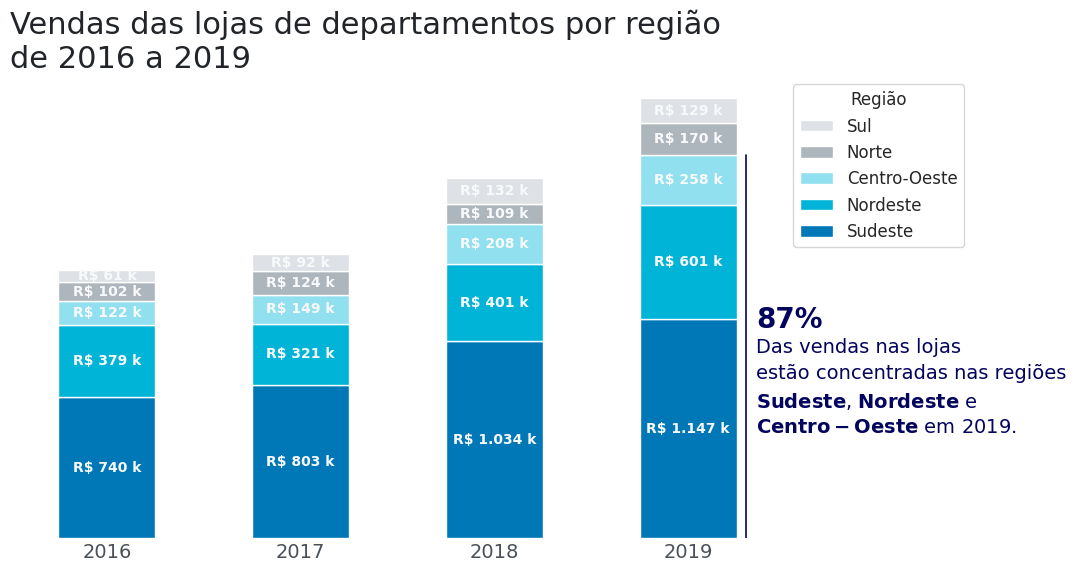

In [26]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Chamando a função do gráfico de barras
ax = grafico_vendas_regiao()

# Adicionando legenda
ax.legend(bbox_to_anchor=(1, 1), reverse=True, title='Região', title_fontsize=12, fontsize=12)
# bbox_to_anchor = determinan a posição do elemento na figura (1, 1) == canto superior direito

# Adicionando os valores
for container in ax.containers:
  labels = [f'R$ {valor.get_height()/1000:,.0f} k'.replace(',', '.') for valor in container]
  ax.bar_label(container, label_type='center', labels=labels,
               size=10, color=CINZA5, fontweight='bold')

# Adicionando uma linha lvertical para identificar as variáveis
ax.axvline(x=3.3, ymin=0, ymax=0.83, color=AZUL1, linewidth=1.2)

# Obtendo a figura
fig = ax.get_figure()

In [27]:
# Criando um df com os dados desejados
df_envio = vendas.copy()
df_envio = df_envio[['modo_envio', 'segmento_cliente']]

# Cruzando os dados categóricos
df_envio_seg = pd.crosstab(index=df_envio.modo_envio, columns=df_envio.segmento_cliente).sort_values('B2B')

# Exibindo os dados
df_envio_seg

segmento_cliente,B2B,B2C
modo_envio,,
24 horas,207,288
Envio rápido,676,673
Econômica,829,906
Entrega padrão,2552,2809


In [28]:
# Normalizando o df
df_envio_normalizado = pd.crosstab(index=df_envio.modo_envio, columns=df_envio.segmento_cliente, normalize='index')

# Normalizar = soma os valores e divide pelos seus pesos (valor / total)

# Exibindo o df
df_envio_normalizado

segmento_cliente,B2B,B2C
modo_envio,,
24 horas,0.418182,0.581818
Econômica,0.477810,0.522190
Entrega padrão,0.476031,0.523969
Envio rápido,0.501112,0.498888


In [29]:
# Importando o módulo transforms do matplotlib para colorir o texto do gráfico
from matplotlib import transforms

# Declarando uma função para colorir o texto
def text_colorido(x, y, texto, cores, esp=20, ax=None, **kw):

  # Obtém as cores e outras informações
  cores = list(reversed(cores))
  t = ax.transData
  canvas = ax.figure.canvas

  # Percorre o texto e personaliza-o
  for i, linha in enumerate(reversed(texto.split('\n'))):
    frases = linha.split('||')
    for s, cor in zip(frases, cores[i]):
      texto = ax.text(x, y, s, color=cor, transform=t, **kw)
      texto.draw(canvas.get_renderer())
      ex = texto.get_window_extent()
      t = transforms.offset_copy(texto._transform, x=ex.width, units='dots')

    t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

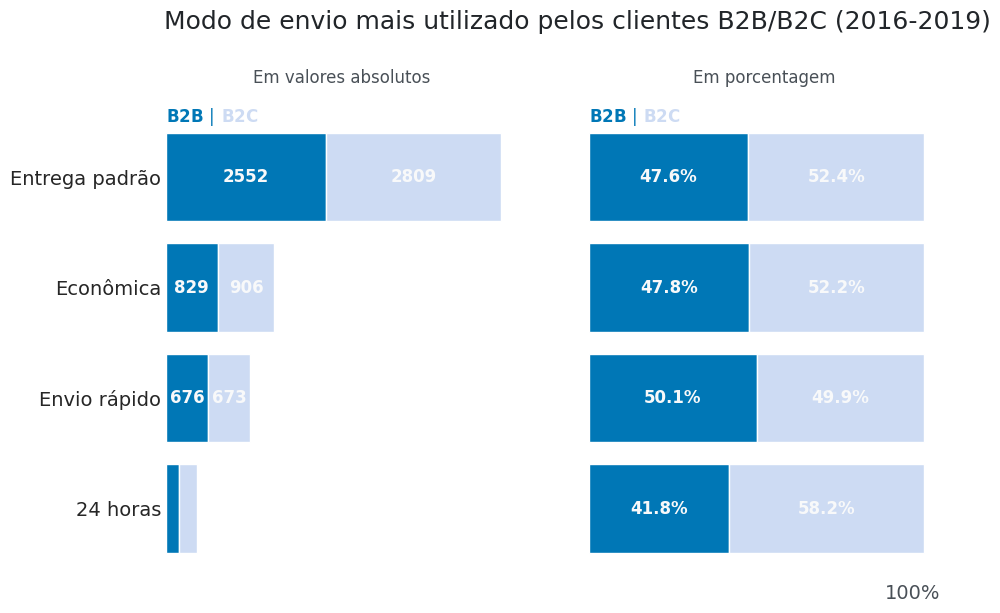

In [30]:
# Área do gráfico e tema da visualização
fig, axs = plt.subplots(1, 2, figsize=(10,6), sharey = True)

# Cores
cores = [AZUL2, AZUL5]

# GRÁFICO 1 - Barras empilhadas
axs[0].barh(df_envio_seg.index, df_envio_seg["B2B"], color = cores[0])
axs[0].barh(df_envio_seg.index, df_envio_seg["B2C"], left = df_envio_seg["B2B"], color = cores[1])
axs[0].set_title('Em valores absolutos\n', color = CINZA2)
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].set_xticklabels([])
axs[0].yaxis.set_tick_params(labelsize=14, color = CINZA2)
axs[0].set_frame_on(False)

# remover todos os ticks do eixo x e y
axs[0].tick_params(axis='both', which='both', length=0)

texto_colorido(0, 3.5, '$\\bf{B2B}$ | || $\\bf{B2C}$', cores = [cores], ax=axs[0], fontsize=12) # legenda

# GRÁFICO 2 - Barras empilhadas 100 %
axs[1].barh(df_envio_normalizado.index, df_envio_normalizado["B2B"], color = cores[0])
axs[1].barh(df_envio_normalizado.index, df_envio_normalizado["B2C"], left = df_envio_normalizado["B2B"], color = cores[1])
axs[1].set_title('Em porcentagem\n', color = CINZA2)
axs[1].set_xlabel('100%', color = CINZA2, size = 14, loc='right')
axs[1].set_ylabel('')
axs[1].set_xticklabels([])
axs[1].set_frame_on(False)

# remover todos os ticks do eixo x e y
axs[1].tick_params(axis='both', which='both', length=0)

texto_colorido(0, 3.5, '$\\bf{B2B}$ | || $\\bf{B2C}$', cores = [cores], ax=axs[1], fontsize=12) # legenda

# Título dos gráficos
fig.suptitle("Modo de envio mais utilizado pelos clientes B2B/B2C (2016-2019)\n",
             fontsize=18, color=CINZA1, ha = 'right', x = 0.95, y = 1.05)

# Valores das barras
for container in axs[0].containers:
    labels = [str(valor.get_width()) if valor.get_width() > 300 else '' for valor in container]
    axs[0].bar_label(container, label_type='center', labels = labels, size = 12, color = CINZA5, fontweight='bold')

for container in axs[1].containers:
    labels = [f'{valor.get_width()*100:.1f}%' for valor in container]
    axs[1].bar_label(container, label_type='center', labels = labels, size = 12, color = CINZA5, fontweight='bold')

fig.show()

## Aula 2 - desafio

In [31]:
# Criando um data frame com os dados desejados
vendas_co = vendas.copy()
vendas_co = vendas_co[['data_pedido', 'regiao', 'estado', 'vendas']]

# Obtendo apenas os anos
vendas_co['ano'] = vendas_co.data_pedido.dt.year

# Selecionando os dados
vendas_co = vendas_co.query('regiao == "Centro-Oeste" and (ano == 2017 or ano == 2018)')

# Removendo colunas
vendas_co.drop(labels=['data_pedido', 'regiao'], axis=1, inplace=True)

# Exibindo o df
vendas_co

,estado,vendas,ano
26,Distrito Federal,10483.69,2017
27,Distrito Federal,32.70,2017
28,Distrito Federal,422.28,2017
29,Distrito Federal,11.10,2017
30,Distrito Federal,293.40,2017
...,...,...,...
8737,Distrito Federal,421.35,2018
8833,Mato Grosso,289.20,2017
8884,Distrito Federal,114.00,2018
8885,Distrito Federal,124.92,2018


In [32]:
# Criando uma tabela cruzada
vendas_co_ano = pd.crosstab(index=vendas_co.ano, columns=vendas_co.estado,
                            values=vendas_co.vendas, aggfunc='sum')

# Exibindo df
vendas_co_ano

estado,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul
ano,,,,
2017,64308.70,66078.33,5259.46,13568.51
2018,103036.69,79801.93,10980.07,14250.02


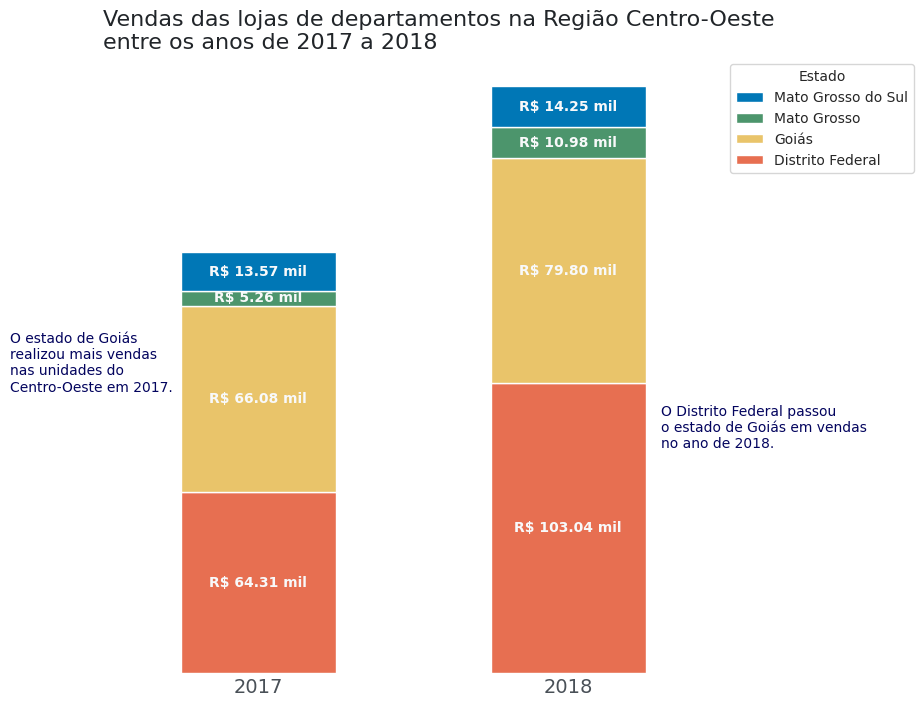

In [33]:
# Definindo as cores do gráfico
cores = [VERMELHO1, AMARELO1, VERDE1, AZUL2]

# Gerando gráfico de colunas empilhadas
ax = vendas_co_ano.plot(kind='bar', stacked=True, figsize=(8, 8), color=cores)

# Personalizando o gráfico
ax.set_title('Vendas das lojas de departamentos na Região Centro-Oeste\nentre os anos de 2017 a 2018',
             loc='left', fontsize=16, color = CINZA1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2, rotation=0)
ax.set_frame_on(False)

# Removendo ticks dos eixos x e y
ax.tick_params(axis='both', which='both', length=0)

# Anotando uma conclusão no gráfico
ax.text(-0.8, 1e5, 'O estado de Goiás\nrealizou mais vendas\nnas unidades do\nCentro-Oeste em 2017.',
        fontsize=10, linespacing=1.2, color=AZUL1)
ax.text(1.3, 8e4, 'O Distrito Federal passou\no estado de Goiás em vendas\nno ano de 2018.',
        fontsize=10, linespacing=1.2, color=AZUL1)

# Personalizando a legenda
ax.legend(bbox_to_anchor=(1, 1), reverse=True, title='Estado', title_fontsize=10, fontsize=10)

# Adicionando valores
for container in ax.containers:
  labels = [f'R$ {valor.get_height()/1000:,.2f} mil'.replace(',', '.') for valor in container]
  ax.bar_label(container, label_type='center', labels=labels, size=10, color=CINZA5, fontweight='bold')

# Obtendo a figura
fig = ax.get_figure()

In [34]:
# Criando um df
df_depart = vendas.copy()

# Selecionando dados
df_depart = df_depart[['departamento','modo_envio']]

# Criando uma tabela cruzada com a frequência (porcentagem) de modo de envio por departamento
df_depart = pd.crosstab(index=df_depart.departamento, columns=df_depart.modo_envio, normalize='index')

# Exibindo o df
df_depart

modo_envio,24 horas,Econômica,Entrega padrão,Envio rápido
departamento,,,,
Automotivo,0.051766,0.195493,0.593179,0.159562
Jardinagem e paisagismo,0.055504,0.190854,0.605569,0.148073
Materiais de construção,0.058133,0.202133,0.588267,0.151467


In [35]:
# Definindo uma função para gerar textos colorido
def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):

  # Obtendo cores e outras informações
  cores = list(reversed(cores))
  t = ax.transData
  canvas = ax.figure.canvas

  # Percorrendo o texto e colorindo-o
  for i, linha in enumerate(reversed(texto.split('\n'))):
    frases = linha.split('||')
    for s, cor in zip(frases, cores[i]):
      texto = ax.text(x, y, s, color=cor, transform=t, **kw)
      texto.draw(canvas.get_renderer())
      ex = texto.get_window_extent()
      t = transforms.offset_copy(texto._transform, x=ex.width, units='dots')

    t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

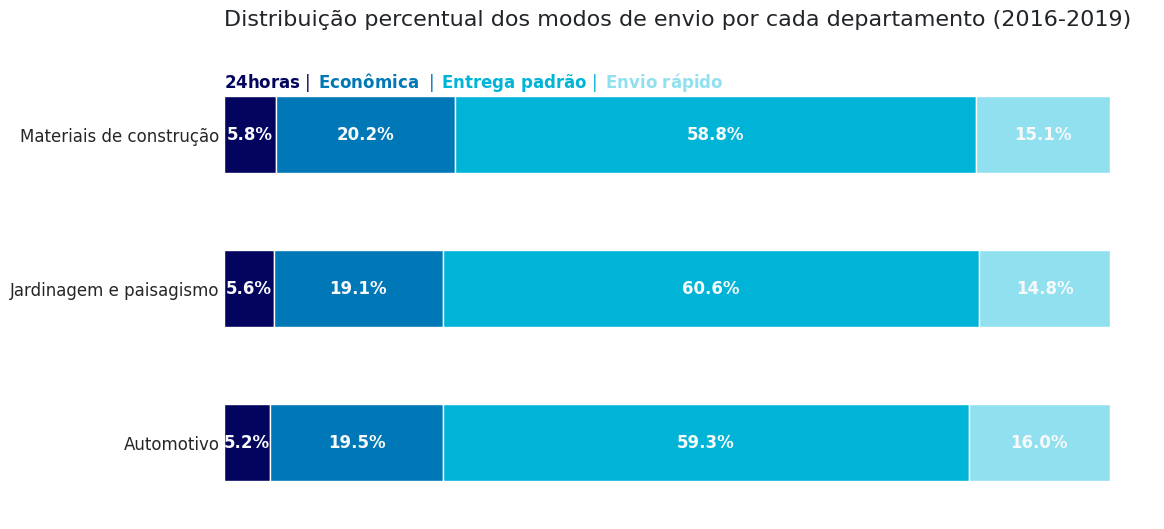

In [36]:
# Definindo as cores do gráfico
cores = [AZUL1, AZUL2, AZUL3, AZUL4]

# Gerando o gráfico com barras empilhadas
ax = df_depart.plot(kind='barh', stacked=True, figsize=(12, 6), color=cores, legend=None)

# Personalizando o gráfico
ax.set_title('Distribuição percentual dos modos de envio por cada departamento (2016-2019)\n',
             fontsize=16, loc='left', color=CINZA1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.yaxis.set_tick_params(labelsize=12, color=CINZA2)
ax.set_frame_on(False)

# Removendo os ticks dos eixos x e y
ax.tick_params(axis='both', which='both', length=0)

# Colorindo os textos
texto_colorido(0, 2.3, '$\\bf{24 horas}$ | || $\\bf{Econômica}$  | || $\\bf{Entrega\ padrão}$ | || $\\bf{Envio\ rápido}$',
               cores = [cores], ax=ax, fontsize=12)

# Adicioando valores às barras
for container in ax.containers:
  labels = [f'{valor.get_width()*100:.1f}%' for valor in container]

  ax.bar_label(container, label_type='center', labels=labels,
               size=12, color=CINZA5, fontweight='bold')

# Obtendo a figura
fig = ax.get_figure()

## Séries temporais

In [37]:
# Criando um df e selecionando os dados
df_sp = vendas.copy()
df_sp = df_sp.query('estado == "São Paulo"')[["data_pedido", "vendas"]]

# Agrupando os dados por trimestre e arredondando os valores para milhares
df_sp.set_index('data_pedido', inplace=True)
df_sp['vendas'] = round(df_sp['vendas'] / 1e3, 2)
df_sp = df_sp.resample('QE').agg('sum')
df_sp

,vendas
data_pedido,
2016-03-31,41.90
2016-06-30,43.77
2016-09-30,154.89
2016-12-31,144.81
2017-03-31,36.15
2017-06-30,76.89
2017-09-30,129.81
2017-12-31,197.94
2018-03-31,44.30


In [38]:
# Resetando o index
df_sp = df_sp.reset_index()

# Definindo como df
df_sp.columns = ['data_pedido', 'vendas']

# Exibindo o df
df_sp

,data_pedido,vendas
0,2016-03-31,41.90
1,2016-06-30,43.77
2,2016-09-30,154.89
3,2016-12-31,144.81
4,2017-03-31,36.15
5,2017-06-30,76.89
6,2017-09-30,129.81
7,2017-12-31,197.94
8,2018-03-31,44.30
9,2018-06-30,109.64


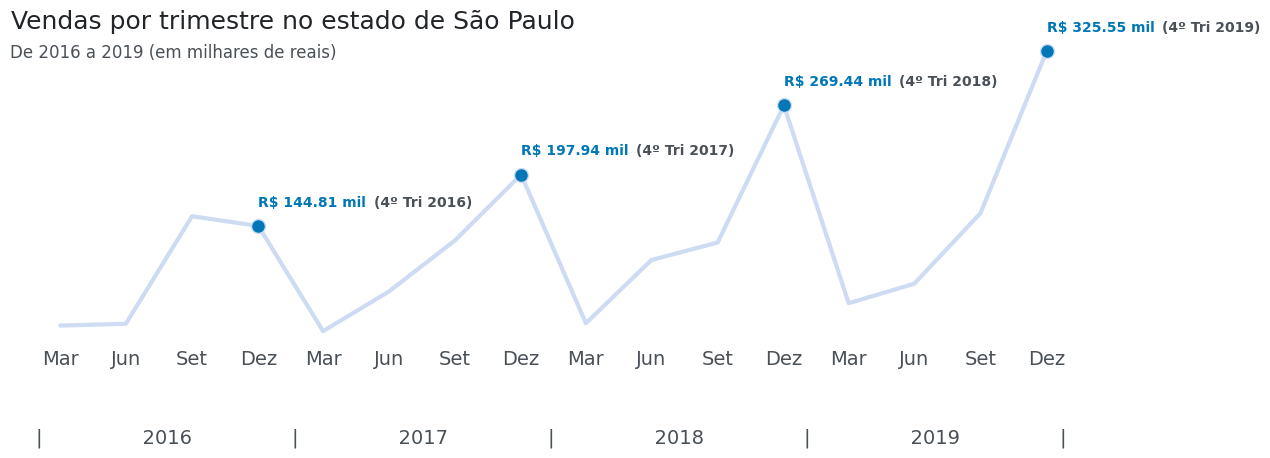

In [39]:
import matplotlib.dates as mdates

def grafico_vendas_sp_tri():

    import matplotlib.pyplot as plt


    fig, ax = plt.subplots(figsize=(14,4))


    pontos_a_marcar = [True if mes == 12 else False for mes in df_sp["data_pedido"].dt.month]

    ax.plot(df_sp["data_pedido"], df_sp["vendas"], lw = 3, color = AZUL5, marker = "o", markersize = 10, markerfacecolor = AZUL2, markevery =  pontos_a_marcar)

    ax.set_title('Vendas por trimestre no estado de São Paulo', fontsize = 18, color = CINZA1, loc='left')
    ax.text(0.3, 0.95, "De 2016 a 2019 (em milhares de reais)", transform=ax.transAxes, color= CINZA2, fontsize=12, ha='right', va='center')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yticklabels([])
    ax.set_frame_on(False)
    ax.xaxis.set_tick_params(labelsize=14, labelcolor = CINZA2)

    ax.tick_params(axis='both', which='both', length=0)

    ## Ajustes no eixo x
    # Definindo o intervalo em trimestres e colocando os nomes dos meses nos labels
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    x_labels = ["Mar", "Jun", "Set", "Dez"] * 4
    ax.set_xticks(df_sp.data_pedido)
    ax.set_xticklabels(x_labels, ha = "center")

    # # Ajustando o eixo x colocando um nível acima de granularidade por meio da exibição do ano
    texto = [16*" " + str(i) + 16*" " for i in range(2016, 2020)]
    ax.text(ax.get_xbound()[0] + 35, - 80, f'|{texto[0]}|{texto[1]}|{texto[2]}|{texto[3]}|', fontsize=14, color=CINZA2)

    # # Destacando os valores do 4º trimestre
    ano = 0
    for i in range(3, len(df_sp["vendas"]), 4):
      ax.text(x = ax.get_xticks()[i], y = df_sp["vendas"][i] + 20, s = f"R$ {df_sp['vendas'][i]} mil", color = AZUL2, weight = "bold", fontsize = 10)
      ax.text(x = ax.get_xticks()[i] + 160, y = df_sp["vendas"][i] + 20, s = f"(4º Tri {2016 + ano})", color = CINZA2, weight = "bold", fontsize = 10)
      ano +=1

    fig = ax.get_figure()

grafico_vendas_sp_tri()

In [40]:
# Criando um df com os dados desejados
df_am = vendas.copy()
bienio = [2018, 2019]
df_am = df_am.query('estado == "Amazonas" and data_pedido.dt.year == @bienio')[["data_pedido", "vendas"]]

# Agrupando as vendas por início do mês (MS)
df_am.set_index("data_pedido", inplace = True)
df_am = df_am.resample("MS").agg("sum")
df_am = df_am.reset_index()
df_am.head()

,data_pedido,vendas
0,2018-01-01,532.16
1,2018-02-01,568.42
2,2018-03-01,8691.91
3,2018-04-01,712.42
4,2018-05-01,11791.93


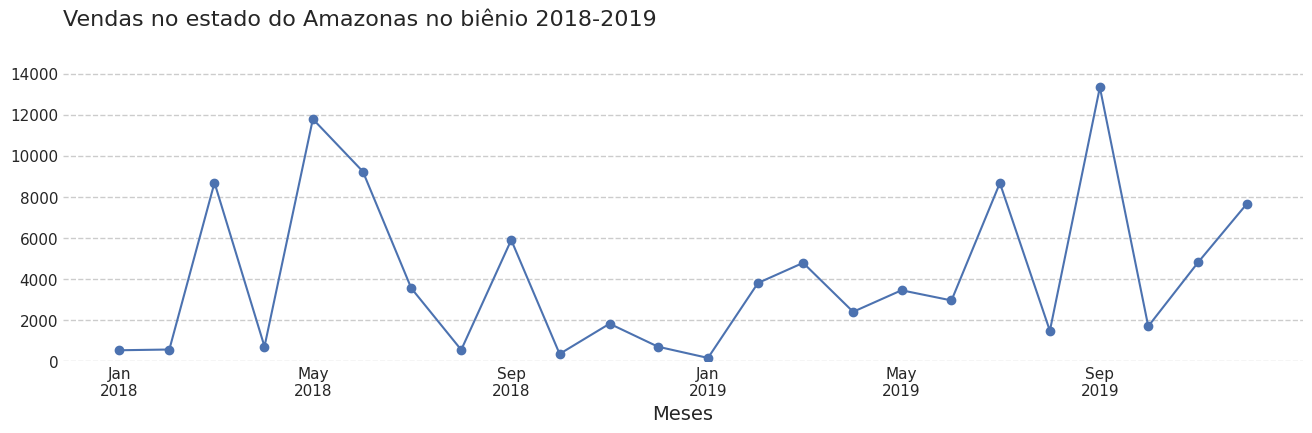

In [41]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(16,4))

# Criando o gráfico de linha das vendas pelo biênio 2018-2019
ax.plot(df_am["data_pedido"], df_am["vendas"], marker = "o")

## Personalizando o gráfico
ax.set_title('Vendas no estado do Amazonas no biênio 2018-2019', fontsize = 16, loc='left', pad = 20)
ax.set_xlabel('Meses', fontsize = 14)
ax.set_ylabel('')
ax.grid(axis = "y", linestyle="--")
ax.set_frame_on(False)

# remover todos os ticks do eixo x e y
ax.tick_params(axis='both', which='both', length=0)

# Descrevendo o limite mínimo e máximo do eixo y
plt.ylim(0, 15000)

# Definindo o intervalo de 4 em 4 meses (quadrimestre)
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth = range(1,12,4)))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b\n%Y"))
ax.set_xticks(ax.get_xticks()[:-1])   # retirando o último tick que não possui valores (Jan/2020)

plt.show()

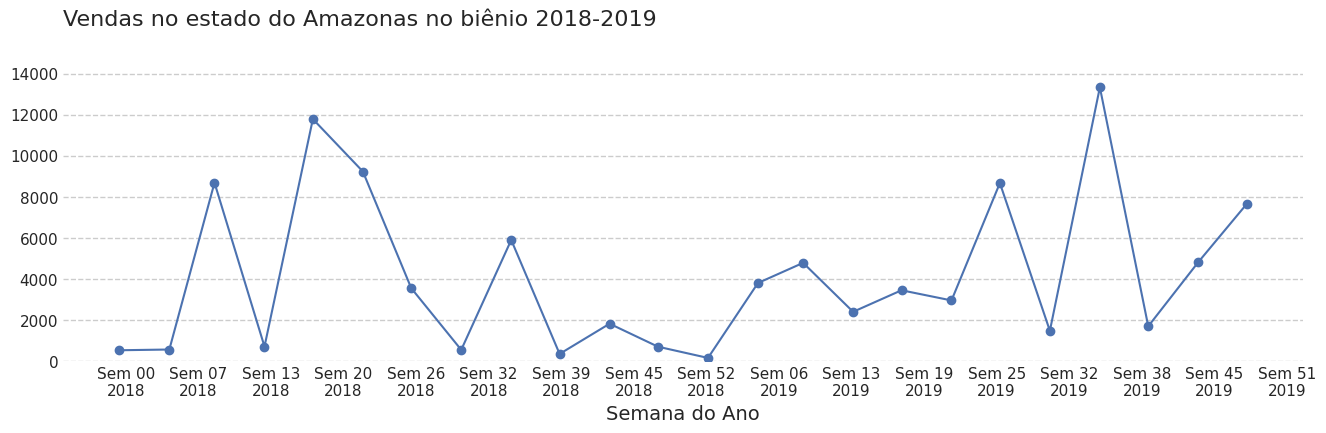

In [42]:
# Atualizando o gráfico para dados semanais
ax.set_xlabel('Semana do Ano', fontsize = 14)

# Definindo o intervalo em 45 dias e passando os valores de ticks como Semana e ano
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 45))
ax.xaxis.set_major_formatter(mdates.DateFormatter("Sem %U\n%Y"))

ax.get_figure()

In [43]:
df_regiao = vendas.copy()
df_regiao = df_regiao[["regiao", "data_pedido", "vendas"]]


df_regiao = pd.crosstab(index = df_regiao.data_pedido, columns = df_regiao.regiao, values = df_regiao.vendas, aggfunc="sum")


df_regiao = df_regiao[["Sudeste", "Nordeste", "Centro-Oeste", "Norte", "Sul"]]
df_regiao

regiao,Sudeste,Nordeste,Centro-Oeste,Norte,Sul
data_pedido,,,,,
2016-01-04,55.92,NaN,NaN,NaN,NaN
2016-01-05,979.42,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,66.42,NaN,NaN
2016-01-07,14940.66,43.44,NaN,NaN,NaN
2016-01-08,296.37,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2019-12-27,NaN,2552.32,152.15,NaN,10.64
2019-12-28,603.96,NaN,NaN,NaN,NaN
2019-12-29,677.65,4079.73,NaN,456.94,NaN


In [44]:
df_regiao = df_regiao.resample('QE').agg('sum')
df_regiao = round(df_regiao/1e3, 2)
df_regiao

regiao,Sudeste,Nordeste,Centro-Oeste,Norte,Sul
data_pedido,,,,,
2016-03-31,70.18,41.73,16.80,9.31,1.51
2016-06-30,122.72,87.41,30.83,24.68,10.62
2016-09-30,226.43,158.12,39.61,21.94,11.97
2016-12-31,320.27,91.27,34.41,45.65,37.19
2017-03-31,127.89,61.58,5.90,35.25,4.75
2017-06-30,161.54,54.93,16.96,13.35,21.23
2017-09-30,206.29,91.60,48.82,48.71,21.68
2017-12-31,307.28,112.69,77.54,26.86,44.34
2018-03-31,120.56,92.40,29.30,39.03,6.95


In [45]:
import plotly.express as px

fig = px.line(df_regiao, x=df_regiao.index, y=df_regiao.columns, markers = True, labels={"regiao": "Região"},
              color_discrete_sequence=[AZUL2, VERMELHO1, AMARELO1 , VERDE1, CINZA3])

fig.update_layout(width=1300, height=600, font_family = 'DejaVu Sans', font_size=15,
                  font_color= CINZA2, title_font_color= CINZA1, title_font_size=24,
                  title_text='Faturamento da loja de departamentos por trimestre' +
                             '<br><sup size=1 style="color:#555655">De 2016 a 2019</sup>',
                  xaxis_title='', yaxis_title='', plot_bgcolor= CINZA5)

fig.update_yaxes(tickprefix="R$ ", ticksuffix=" mil")

labels = ['T1<br>2016', 'T2<br>2016', 'T3<br>2016', 'T4<br>2016',
          'T1<br>2017', 'T2<br>2017', 'T3<br>2017', 'T4<br>2017',
          'T1<br>2018', 'T2<br>2018', 'T3<br>2018', 'T4<br>2018',
          'T1<br>2019', 'T2<br>2019', 'T3<br>2019', 'T4<br>2019']
fig.update_xaxes(ticktext = labels, tickvals=df_regiao.index)

fig.show()

In [46]:
# Dados ao passar o mouse
fig.update_traces(mode='markers+lines', hovertemplate = '<b>Período<b> %{x} br <b>Faturamento<b> %{y}')
# fig.update_layout(hovermode='closest')    # para exibir apenas do dado que passamos o mouse
# fig.update_layout(hovermode='x')          # para exibir todos os dados do período em cada linha
fig.update_layout(hovermode='x unified')  # para exibir o resumo de todos os dados no período

fig.show()

## Aula 3 - desafio

In [47]:
# Criando um df com os dados desejados
df_estado = vendas.copy()
df_estado = df_estado.query('estado == "Bahia"')[["data_pedido", "vendas"]]

# Agrupando as vendas por final do semestre (2Q)
df_estado.set_index('data_pedido', inplace=True)
df_estado = df_estado.resample('2QE', closed='left').agg('sum')
df_estado = df_estado.reset_index()
df_estado.head()

,data_pedido,vendas
0,2016-06-30,48100.19
1,2016-12-31,84362.51
2,2017-06-30,25747.57
3,2017-12-31,43287.77
4,2018-06-30,47121.96


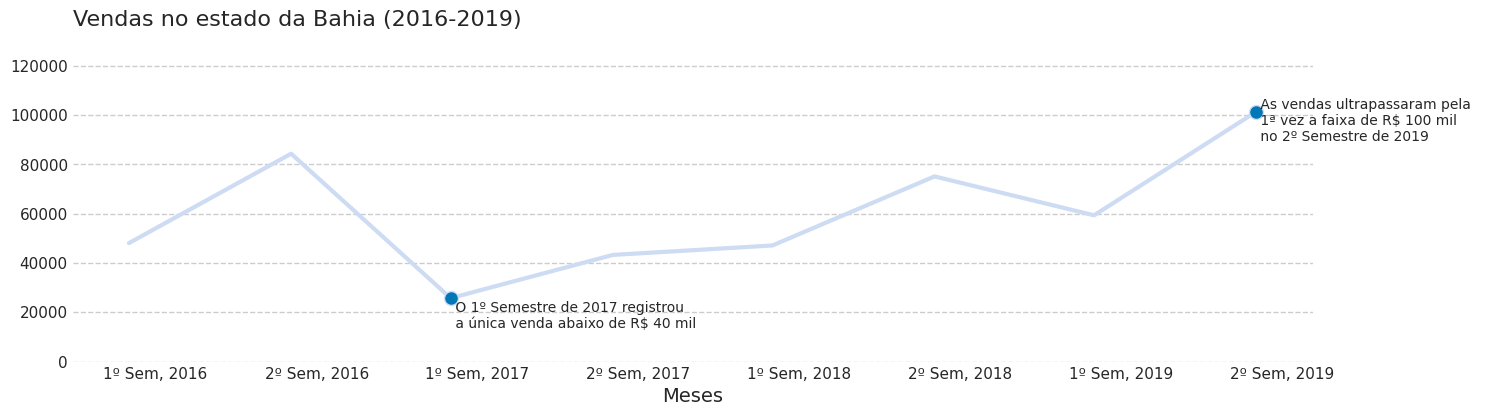

In [48]:
# Criando uma figura
fig, ax = plt.subplots(figsize=(16, 4))

# Resgatando o valor minimo, maximo das vendas
venda_min = df_estado.vendas.min()
venda_max = df_estado.vendas.max()
valores = df_estado.vendas.values

# Gerando a lista com os pontos a marcar (True apenas para mínimo e máximo)
pontos_a_marcar = list((valores == venda_min) | (valores == venda_max))

# Criando o gráfico de linha das vendas
ax.plot(df_estado['data_pedido'], df_estado['vendas'], lw=3, color=AZUL5, marker='o',
        markersize=10, markerfacecolor=AZUL2, markevery=pontos_a_marcar)

# Personalizando o gráfico
ax.set_title('Vendas no estado da Bahia (2016-2019)', fontsize = 16, loc='left', pad = 20)
ax.set_xlabel('Meses', fontsize = 14)
ax.set_ylabel('')
ax.grid(axis='y', linestyle='--')
ax.set_frame_on(False)

# Removendo os ticks dos eixos x e y
ax.tick_params(axis='both', which='both', length=0)

# Descrevendo os limites mínimo e máximo do eixo y
plt.ylim(0, 1.25e5)

# Definindo o intevalo semestral para os dados
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[6, 12]))
labels = ["1º Sem, 2016", "2º Sem, 2016", "1º Sem, 2017", "2º Sem, 2017",
          "1º Sem, 2018", "2º Sem, 2018", "1º Sem, 2019", "2º Sem, 2019"]
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(labels, ha='left')

# Escrevendo textos nos pontos de destaque
for x, y in zip(df_estado.data_pedido, df_estado.vendas):
  if y == venda_min:
    ax.text(x, y=y - 1.2e4, s=f" O 1º Semestre de 2017 registrou \n a única venda abaixo de R$ 40 mil", fontsize = 10)
  if y == venda_max:
    ax.text(x, y=y - 1.2e4, s=f" As vendas ultrapassaram pela \n 1ª vez a faixa de R$ 100 mil \n no 2º Semestre de 2019", fontsize = 10)

# Exibindo o gráfico
plt.show()

In [49]:
# Criando um df com os dados desejados
df_ne = vendas.copy()
df_ne = df_ne.query("regiao == 'Nordeste'")[["estado","data_pedido", "lucro"]]

# Criando uma tabela cruzada (crosstab) com os valores de lucro por dia por estado
df_estado_ne = pd.crosstab(index=df_ne.data_pedido, columns=df_ne.estado, values=df_ne.lucro, aggfunc='sum')

# Agrupando os lucros por ano
df_estado_ne = df_estado_ne.resample('YE').agg('sum')
df_estado_ne = round(df_estado_ne / 1e3, 2)
df_estado_ne

estado,Alagoas,Bahia,Ceará,Maranhão,Paraíba,Pernambuco,Piauí,Rio Grande do Norte,Sergipe
data_pedido,,,,,,,,,
2016-12-31,1.20,9.98,10.25,1.88,-0.27,11.73,0.02,0.27,0.89
2017-12-31,3.77,6.89,9.88,1.60,-2.20,4.24,1.43,0.65,0.98
2018-12-31,3.13,8.59,6.40,2.69,0.15,9.18,5.43,1.44,0.55
2019-12-31,1.45,14.09,30.26,5.07,1.60,6.98,1.34,2.09,1.95


In [50]:
# Gerando um gráfico de linha com os lurcos das lojas por ano dividido por estado da região nordeste
fig = px.line(df_estado_ne, x=df_estado_ne.index, y=df_estado_ne.columns, markers=True, labels={'estado': 'Estados'},
              color_discrete_sequence=[AZUL2, VERMELHO1, AMARELO1 , VERDE1, CINZA3, AZUL5, LARANJA1, CINZA1, AZUL4])

# Ajustando o layout do gráfico
fig.update_layout(width=1300, height=600, font_family='DejaVu Sans', font_size=15,
                  font_color=CINZA2, title_font_color=CINZA1, title_font_size=24,
                  title_text='Lucros das lojas de departamentos por ano na Região Nordeste' +
                             '<br><sup size=1 style="color:#555655">De 2016 a 2019</sup>',
                  xaxis_title='', yaxis_title='', plot_bgcolor=CINZA5)

# Ajustando os ticks do eixo y para o formato em milhar
fig.update_yaxes(tickprefix='R$ ', ticksuffix=' mil')

# Ajustando o eixo x com os labels dos anos
labels = ['2016', '2017', '2018', '2019']
fig.update_xaxes(ticktext=labels, tickvals=df_estado_ne.index)

# Determinando dados quando passar mouse
fig.update_traces(mode='markers+lines', hovertemplate='<b>Período:</b> %{x} <br> <b>Lucro:</b> %{y}')

# Exibindo o gráfico
fig.show()

## Distribuindo os dados

In [51]:
# Obtendo a url dos dados
url = 'https://raw.githubusercontent.com/Matheus-Pombeiro/dataviz_comparison_distribution_charts/refs/heads/main/volume_amaciante.csv'

In [52]:
# Lendo os dados
vol_amaciante = pd.read_csv(url)
vol_amaciante.head()

,Volume
0,999.8
1,999.5
2,999.7
3,999.1
4,999.8


In [53]:
# Obtendo informações estatísticas do df
vol_amaciante.describe()

,Volume
count,1000.00000
mean,999.98970
std,0.48553
min,998.30000
25%,999.70000
50%,1000.00000
75%,1000.30000
max,1001.50000


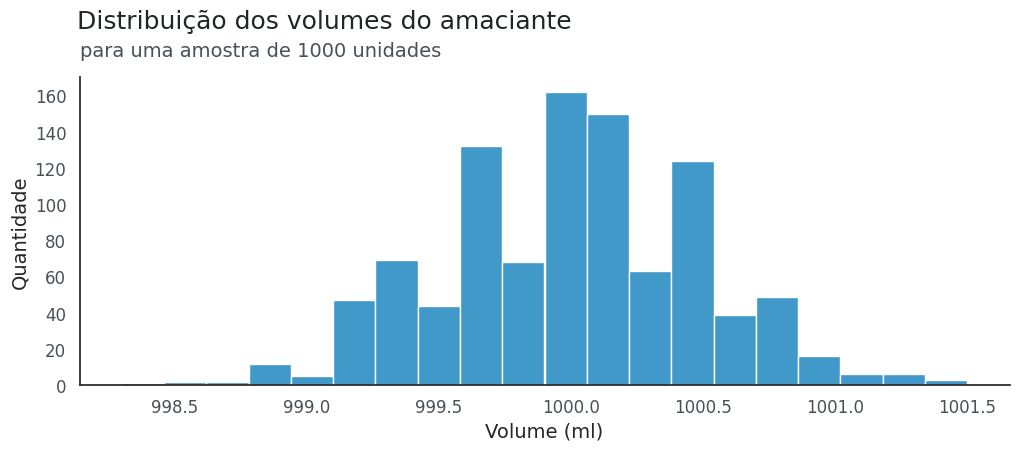

In [54]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Importando as bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns

# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(12,4))
sns.set_theme(style="white")

# Gerando o histograma sem estimativa de densidade
# ax = sns.histplot(data=vol_amaciante, x='Volume', binwidth=0.1, color=AZUL2)
ax = sns.histplot(data=vol_amaciante, x='Volume', bins=20, color=AZUL2)

# binwidth and bins == intervalos

# Personalizando o gráfico
plt.suptitle('Distribuição dos volumes do amaciante', size=18, color=CINZA1, ha = 'right', x = 0.535, y = 1.05)
plt.title('para uma amostra de 1000 unidades', fontsize=14, color=CINZA2, pad = 15, loc = "left")
ax.set_xlabel('Volume (ml)', fontsize = 14)
ax.set_ylabel('Quantidade', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
ax.xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine()

# Exibindo o gráfico
plt.show()

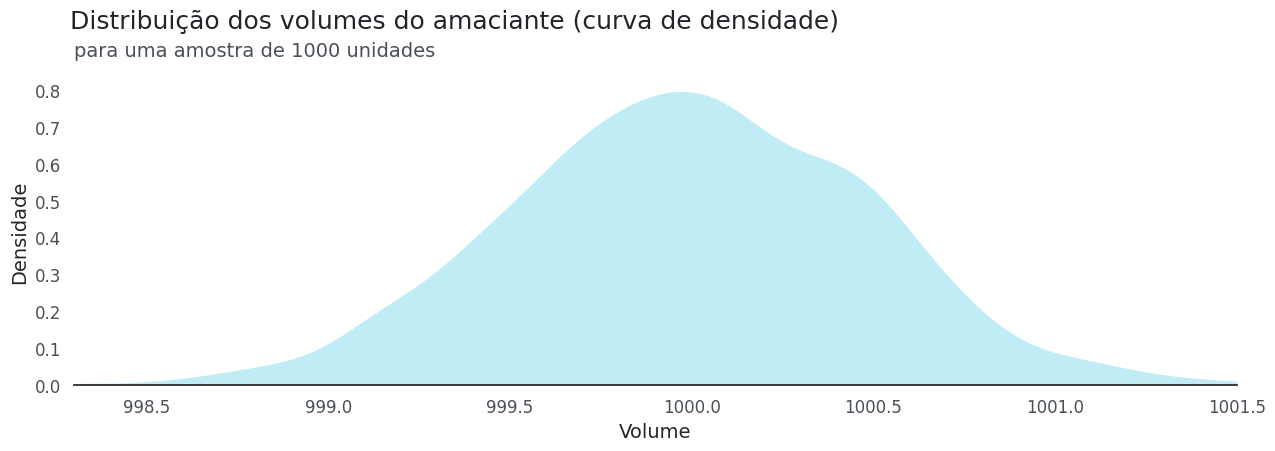

In [55]:
# Gerando a função que desenha a Densidade

def grafico_densidade():
  # Importando as bibliotecas
  import matplotlib.pyplot as plt
  import seaborn as sns

  # Área do gráfico e tema da visualização
  fig, ax = plt.subplots(figsize=(15,4))
  sns.set_theme(style="white")

  # Plottando um gráfico de densidade
  ax = sns.kdeplot(data=vol_amaciante, x='Volume', color=AZUL3, lw=0, fill=True)

  # Personalizando o gráfico
  plt.suptitle('Distribuição dos volumes do amaciante (curva de densidade)', size=18, color=CINZA1, ha = 'right', x = 0.635, y = 1.05)
  plt.title('para uma amostra de 1000 unidades', fontsize=14, color=CINZA2, pad = 15, loc = "left")
  ax.set_xlabel('Volume', fontsize = 14)
  ax.set_ylabel('Densidade', fontsize = 14)
  ax.xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
  ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
  ax.set_xlim(vol_amaciante.Volume.min(), vol_amaciante.Volume.max())
  sns.despine(left = True)

  # Retornando o gráfico
  return ax

# Chamando a função
ax = grafico_densidade()

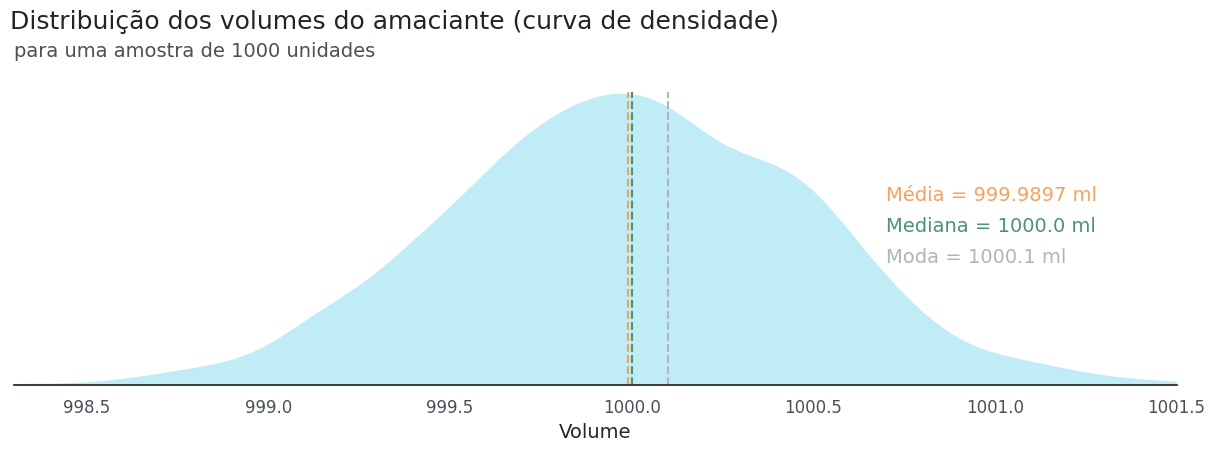

In [56]:
# Chamando a função que gera o gráfico de densidade
ax = grafico_densidade()

## Personalizando o gráfico
ax.set_ylabel('')
ax.set_yticklabels([])

# Gerando as linhas de média, mediana e moda
estat = vol_amaciante.Volume.mean(), vol_amaciante.Volume.median(), vol_amaciante.Volume.mode()[0]
desc = ["Média", "Mediana", "Moda"]

# Definindo as cores de cada estatística descritiva
cores = [LARANJA1, VERDE1, CINZA3]

# Gerando 1 ou mais linhas na vertical a partir de um valor de x
ax.vlines(x=estat, ymin=0, ymax=0.8, colors=cores, linestyles='--')

# Anotando os valores no gráfico
for i in range(len(estat)):
  ax.text(0.75, (0.6 - i / 10), f'{desc[i]} = {estat[i]} ml', fontsize=14, color=cores[i], transform=ax.transAxes)

# Obtendo a figura
fig = ax.get_figure()

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1463: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



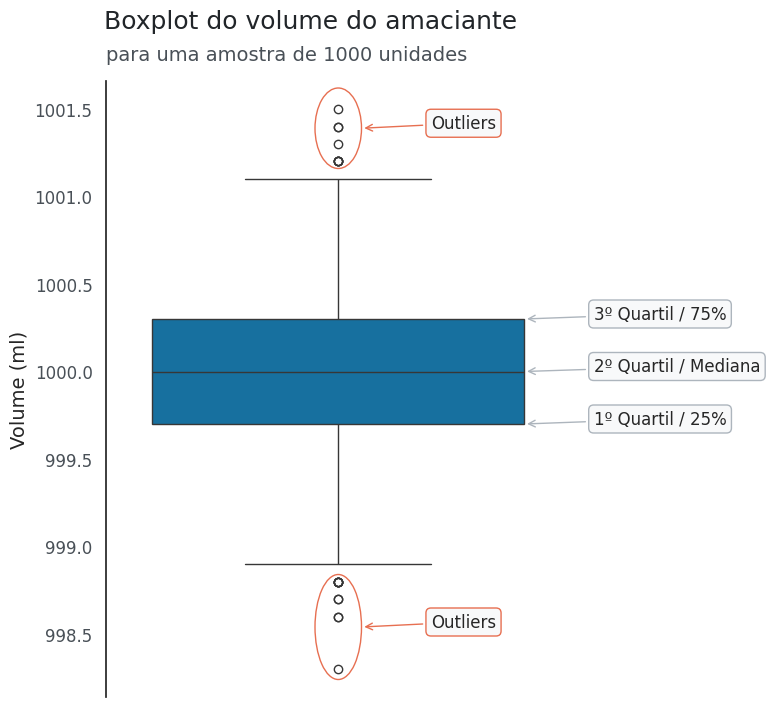

In [57]:
# Importando as bibliotecas
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns

# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(6,8))
sns.set_theme(style="white")

# Gerando o boxplot
ax = sns.boxplot(data=vol_amaciante, y='Volume', orient='v', color=AZUL2)

## Personalizando o gráfico
plt.suptitle('Boxplot do volume do amaciante', size=18, color=CINZA1, ha = 'right', x = 0.81, y = 0.97)
plt.title('para uma amostra de 1000 unidades', fontsize=14, color=CINZA2, pad = 15, loc = "left")
ax.set_xlabel('')
ax.set_ylabel('Volume (ml)', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine(bottom=True)

# Gerando outros elementos visuais (elipses dos outliers)
y_min, y_max = ax.get_ybound()
outlier_sup = Ellipse((0, y_max - 0.27), width=0.1, height=0.46, color=VERMELHO1, fill=False)
outlier_inf = Ellipse((0, y_min + 0.4), width=0.1, height=0.6, color=VERMELHO1, fill=False)
ax.add_patch(outlier_sup)
ax.add_patch(outlier_inf)

# Adicionando a explicação dos elementos de um boxplot
ax.annotate("Outliers", xy=(0 + 0.05, y_max - 0.27), xycoords='data',    # coordenadas do ponto desejado
            bbox=dict(boxstyle="round", fc=CINZA5, ec=VERMELHO1),         # caixa de texto
            xytext=(50, 0), textcoords='offset points',                   # posição do texto
            arrowprops=dict(arrowstyle="->", color=VERMELHO1))            # propriedades da seta

ax.annotate("Outliers", xy=(0 + 0.05, y_min + 0.4), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=VERMELHO1),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=VERMELHO1))
ax.annotate("1º Quartil / 25%", xy=(0.4, vol_amaciante.quantile(.25)), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))

ax.annotate("2º Quartil / Mediana", xy=(0.4, vol_amaciante.median()), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))

ax.annotate("3º Quartil / 75%", xy=(0.4, vol_amaciante.quantile(.75)), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))

# Exibindo o gráfico
plt.show()

## Aula 4 - desafio

In [58]:
# Obtendo a url da base de dados
url = 'https://raw.githubusercontent.com/Matheus-Pombeiro/dataviz_comparison_distribution_charts/refs/heads/main/pop_idade.csv'

In [59]:
# Lendo a base de dados
dados = pd.read_csv(url)
dados.head()

,idade
0,39
1,33
2,41
3,50
4,32


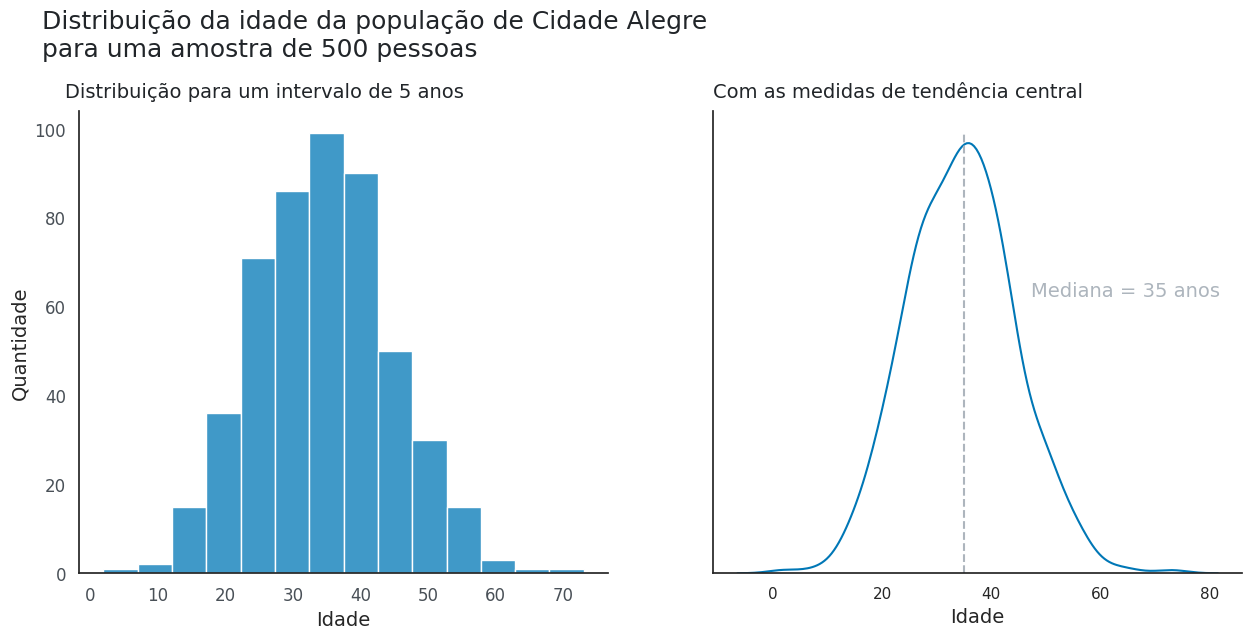

In [60]:
# Criando um gráfico
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Configurando o tema
sns.set_theme(style='white')

# Adicionando um título à figura
fig.suptitle('Distribuição da idade da população de Cidade Alegre \npara uma amostra de 500 pessoas',
             fontsize=18, color=CINZA1, x=0.1, y=1.05, ha='left')

# Plottando o 1º gráfico
sns.histplot(ax=axs[0], data=dados, x='idade', binwidth=5, color=AZUL2)
axs[0].set_title('Distribuição para um intervalo de 5 anos', size=14, color=CINZA1, x = 0.35,  pad = 10)
axs[0].set_xlabel('Idade', fontsize = 14)
axs[0].set_ylabel('Quantidade', fontsize = 14)
axs[0].yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
axs[0].xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine()

# Plottando o 2º gráfico
sns.kdeplot(ax=axs[1], data=dados, x='idade', color=AZUL2)
axs[1].set_title('Com as medidas de tendência central', size=14, color=CINZA1, x = 0.35,  pad = 10)
axs[1].set_xlabel('Idade', fontsize = 14)
axs[1].set_ylabel('')
axs[1].yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
axs[1].set_yticklabels([])
sns.despine()

# Gerando a linha que define a mediana e anotando seu valor
axs[1].vlines(x=dados.idade.median(), ymin = 0, ymax = 0.04, colors = CINZA3, linestyles = "--")
axs[1].text(0.6, 0.6, f'Mediana = {int(dados.idade.median())} anos', fontsize=14, color = CINZA3, transform=axs[1].transAxes)

# Exibindo o gráfico
plt.show()

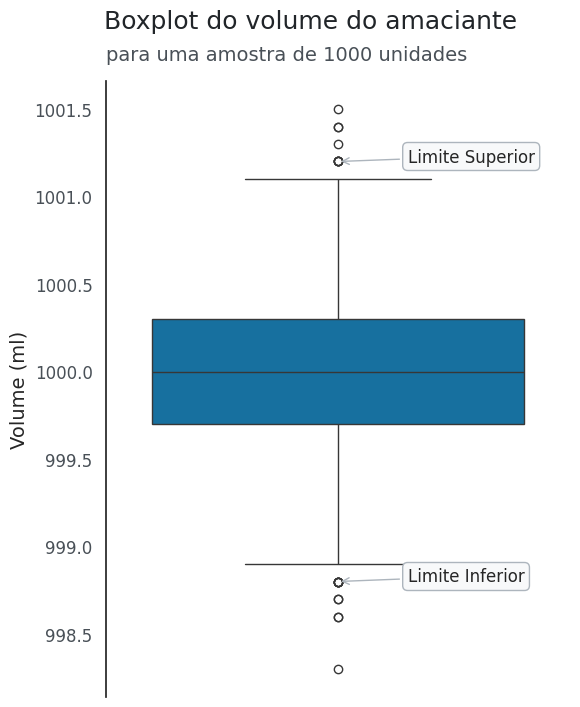

In [61]:
# Criando uma figura
fig, ax = plt.subplots(figsize=(6, 8))

# Plottando o gráfico
ax = sns.boxplot(data=vol_amaciante, y='Volume', orient = "v", color = AZUL2)

# Personalizando o gráfico
plt.suptitle('Boxplot do volume do amaciante', size=18, color=CINZA1, ha = 'right', x = 0.81, y = 0.97)
plt.title('para uma amostra de 1000 unidades', fontsize=14, color=CINZA2, pad = 15, loc = "left")
ax.set_xlabel('')
ax.set_ylabel('Volume (ml)', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine(bottom=True)

# Calculando o intervalo interquartil e os limites máximos e mínimos
IIQ = vol_amaciante['Volume'].quantile(0.75) - vol_amaciante['Volume'].quantile(0.25)
limite_superior = vol_amaciante['Volume'].quantile(0.75) + 1.5 * IIQ
limite_inferior = vol_amaciante['Volume'].quantile(0.25) - 1.5 * IIQ

# Adicionando a anotação dos limites superiores e inferiores de um boxplot
ax.annotate("Limite Superior", xy=(0, limite_superior), xycoords='data',  # coordenadas do ponto desejado
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),                          # caixa de texto
            xytext=(50, 0), textcoords='offset points',                                 # posição do texto
            arrowprops=dict(arrowstyle="->", color=CINZA3))                             # propriedades da seta

ax.annotate("Limite Inferior", xy=(0, limite_inferior), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))


# Exibindo o gráfico
plt.show()

In [62]:
import numpy as np
from wordcloud import WordCloud
from PIL import Image

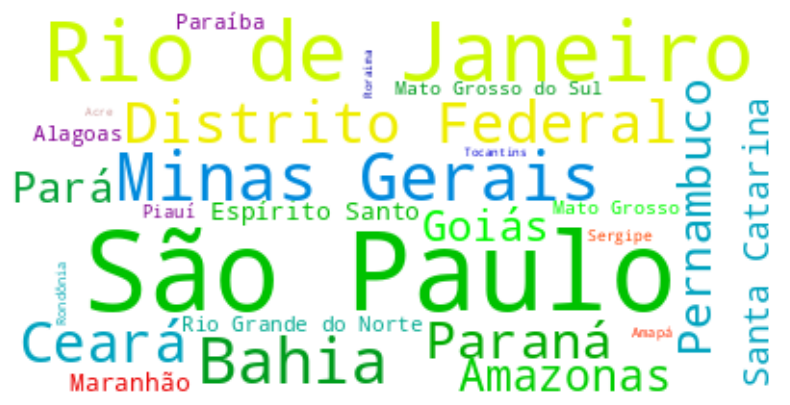

In [63]:
# Gerando um dicionário de frequências
dic = dict(vendas["estado"].value_counts())

# Criar um objeto wordcloud
wordcloud = WordCloud(background_color = 'white',
                      contour_color = 'white',
                      colormap = 'nipy_spectral_r')

# Cria uma wordcloud através do dicionário de frequências
wordcloud.generate_from_frequencies(frequencies = dic)

fig, ax = plt.subplots(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
ax.axis("off")    # retirando bordas e ticks

plt.show()

## Explorando padrões nos dados

In [64]:
# Obtendo a url dos dados
url = 'https://raw.githubusercontent.com/Matheus-Pombeiro/dataviz_comparison_distribution_charts/refs/heads/main/medidas_sabao_em_po.csv'

In [67]:
# Lendo os dados
df_medidas = pd.read_csv(url)

# Obtendo uma amostra aleatória dos dados
df_medidas.sample(5)

,comprimento,altura,largura,amostra
324,20.04,14.95,4.90,B
770,20.08,14.92,4.94,D
884,19.98,15.02,5.07,E
877,19.98,15.02,4.95,E
688,20.04,14.96,4.98,D


In [68]:
# Obtendo informações estatísticas dos dados
df_medidas.describe()

,comprimento,altura,largura
count,1000.000000,1000.00000,1000.000000
mean,20.025740,14.97233,5.000050
std,0.059189,0.06294,0.051081
min,19.910000,14.69000,4.840000
25%,19.980000,14.93000,4.970000
50%,20.020000,14.99000,5.000000
75%,20.060000,15.02000,5.030000
max,20.250000,15.09000,5.190000


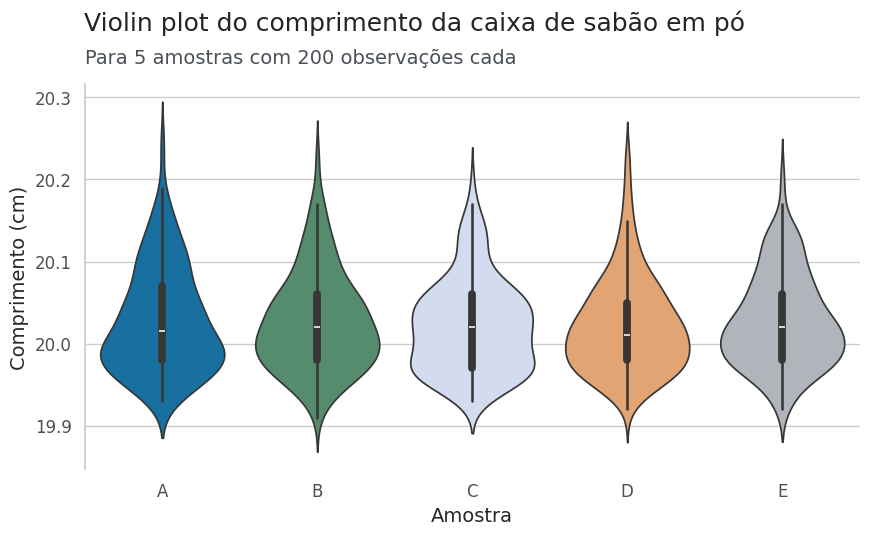

In [73]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style="whitegrid")

# Plottando o gráfico
ax = sns.violinplot(data=df_medidas, x='amostra', y='comprimento',
                    palette=[AZUL2, VERDE1, AZUL5, LARANJA1, CINZA3],
                    hue='amostra', legend=False)

### Personalizando o gráfico
plt.suptitle('Violin plot do comprimento da caixa de sabão em pó', size=18, color=CINZA1, ha = 'right', x = 0.785, y = 1.03)
plt.title('Para 5 amostras com 200 observações cada', fontsize=14, color=CINZA2, pad = 15, loc = "left")
ax.set_xlabel('Amostra',  fontsize = 14)
ax.set_ylabel('Comprimento (cm)', fontsize = 14)
ax.xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine(bottom=True)

plt.show()

In [74]:
# Filtrando os dados
df_a = df_medidas.query("amostra == 'A'")[["comprimento", "altura"]]
df_a.head()

,comprimento,altura
0,20.11,14.89
1,20.13,14.86
2,19.99,15.01
3,20.06,14.93
4,19.99,15.01


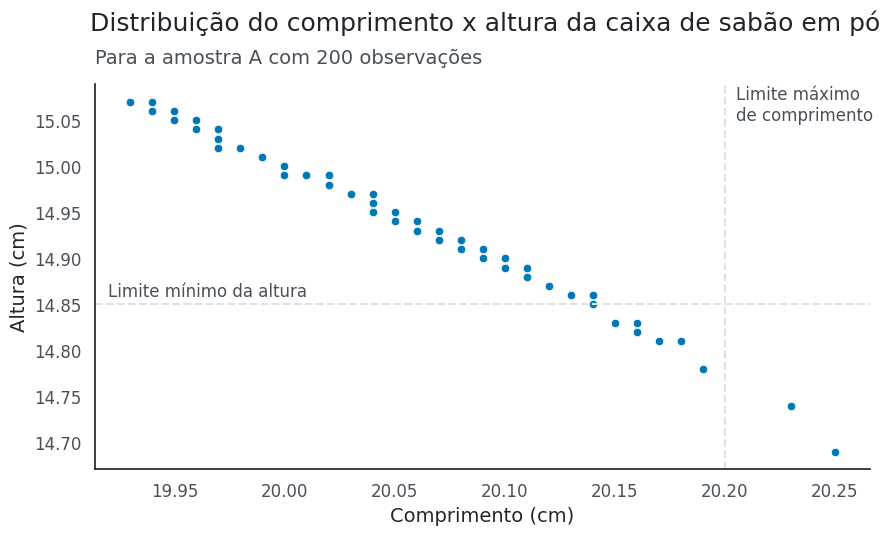

In [77]:
# Gerando a função que cria o gráfico de dispersão
def grafico_dispersao(map_cores: list=[AZUL2], pct: float=0.01):

  # Área do gráfico e tema da visualização
  fig, ax = plt.subplots(figsize=(10,5))
  sns.set_theme(style="white")

  # Plottando o gráfico
  ax = sns.scatterplot(data=df_a, x='comprimento', y='altura', color=map_cores)

  # Personalizando o gráfico
  plt.suptitle('Distribuição do comprimento x altura da caixa de sabão em pó', size=18, color=CINZA1, ha = 'right', x = 0.91, y = 1.03)
  plt.title('Para a amostra A com 200 observações', fontsize=14, color=CINZA2, pad = 15, loc = "left")
  ax.set_xlabel('Comprimento (cm)',  fontsize = 14)
  ax.set_ylabel('Altura (cm)', fontsize = 14)
  ax.xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
  ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
  sns.despine()

  # Desenhando a linha horizontal com o límite mínimo de altura desejado
  ax.text(19.92, 14.855, 'Limite mínimo da altura', fontsize=12, color = CINZA2, va = "bottom")
  plt.axhline(y = 15 * (1 - pct), color = CINZA4, linestyle='--')

  # Desenhando a linha vertical com o límite máximo de comprimento desejado
  ax.text(20.205, 15.05, 'Limite máximo\nde comprimento', fontsize=12, color = CINZA2, ha="left")
  plt.axvline(x = 20 * (1 + pct), color = CINZA4, linestyle='--')

  # Retornando o gráfico
  return ax

# Chamando a função
ax = grafico_dispersao()

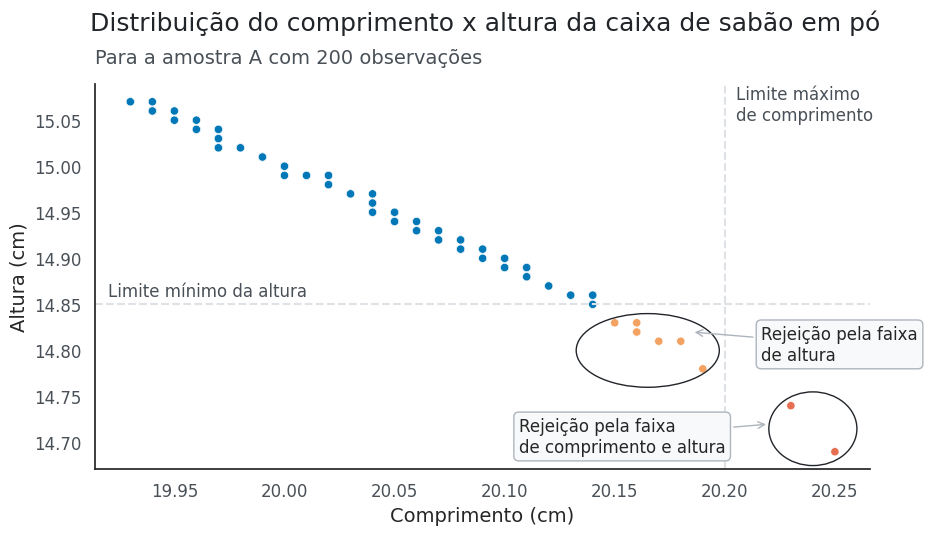

In [80]:
# Definindo as cores do gráfico
cores = [VERMELHO1, LARANJA1, AZUL2]

# Gerando o gráfico de dispersão e rejeitando os valores fora da faixa requisitada (1%)
pct = 0.01
rejeita_comp = [True if (c > 20 * (1 + pct)) or (c < 20 * (1 - pct)) else False for c in df_a['comprimento']]
rejeita_alt = [True if (a > 15 * (1 + pct)) or (a < 15 * (1 - pct)) else False for a in df_a['altura']]

# Mapeando as cores
map_cores = np.where(rejeita_comp, cores[0], np.where(rejeita_alt, cores[1], cores[2]))

# Chamando a função
ax = grafico_dispersao(map_cores, pct=pct)

# Selecionando as áreas de rejeição
rej_comp = Ellipse((20.165, 14.80), width = 0.065, height = 0.08, color=CINZA1, fill=False)
rej_alt = Ellipse((20.24, 14.715), width = 0.04, height = 0.08, color=CINZA1, fill=False)
ax.add_patch(rej_comp)
ax.add_patch(rej_alt)

ax.annotate("Rejeição pela faixa\nde altura", xy=(20.185, 14.82), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, -20), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))

ax.annotate("Rejeição pela faixa\nde comprimento e altura", xy=(20.22, 14.72), xycoords='data',
             bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
             xytext=(-180, -20), textcoords='offset points',
             arrowprops=dict(arrowstyle="->", color=CINZA3))

fig = ax.get_figure()

## Aula 5 - desafio

In [81]:
url = 'https://raw.githubusercontent.com/Matheus-Pombeiro/dataviz_comparison_distribution_charts/refs/heads/main/notas.csv'

In [82]:
notas = pd.read_csv(url)
notas.head()

,Turma,Nota
0,Turma 1,79
1,Turma 1,73
2,Turma 1,80
3,Turma 1,88
4,Turma 1,72


<ipython-input-83-06cb01a95a95>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




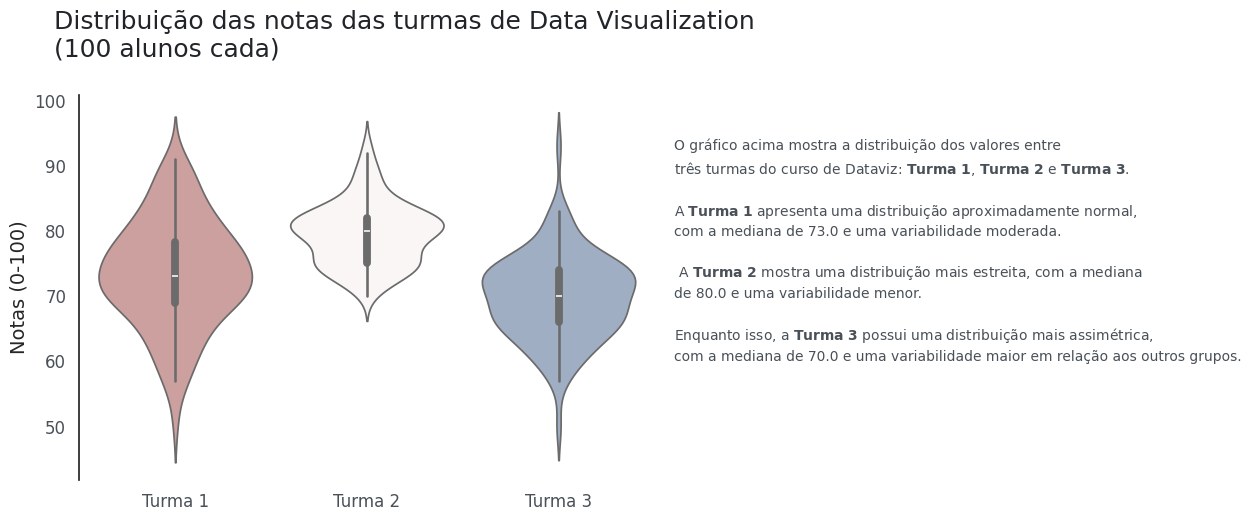

In [83]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(10,5))
fig.subplots_adjust(right = 0.7)
sns.set_theme(style="whitegrid")

# Gerando o violinplot das notas
ax = sns.violinplot(data = notas, x = "Turma", y = "Nota", palette = "vlag_r")

# Personalizando o gráfico
plt.suptitle('Distribuição das notas das turmas de Data Visualization\n(100 alunos cada)', size=18, color=CINZA1, ha = 'left', x = 0.1, y = 1.05)
ax.set_xlabel('')
ax.set_ylabel('Notas (0-100)', fontsize = 14)
ax.xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine(bottom=True)

# Criando uma lista com as medianas de cada turma
mediana = []
for i in range(1,4):
  mediana.append(notas.query(f"Turma == 'Turma {i}'").Nota.median())

# Texto explicativo
ax.text(2.6, 60,
         'O gráfico acima mostra a distribuição dos valores entre\n'
         'três turmas do curso de Dataviz: $\\bf{Turma\ 1}$, $\\bf{Turma\ 2}$ e $\\bf{Turma\ 3}$.\n\n'
         'A $\\bf{Turma\ 1}$ apresenta uma distribuição aproximadamente normal,\n'
         f'com a mediana de {mediana[0]} e uma variabilidade moderada.\n\n'
         ' A $\\bf{Turma\ 2}$ mostra uma distribuição mais estreita, com a mediana\n'
         f'de {mediana[1]} e uma variabilidade menor.\n\n'
         'Enquanto isso, a $\\bf{Turma\ 3}$ possui uma distribuição mais assimétrica,\n'
         f'com a mediana de {mediana[2]} e uma variabilidade maior em relação aos outros grupos.',
         fontsize=10, linespacing=1.45, color=CINZA2)

plt.show()

In [84]:
df_b = df_medidas.query('amostra == "B"')[["comprimento", "largura"]]
df_b.head()

,comprimento,largura
200,19.97,5.10
201,20.13,4.94
202,20.12,4.95
203,20.04,4.96
204,19.97,4.98


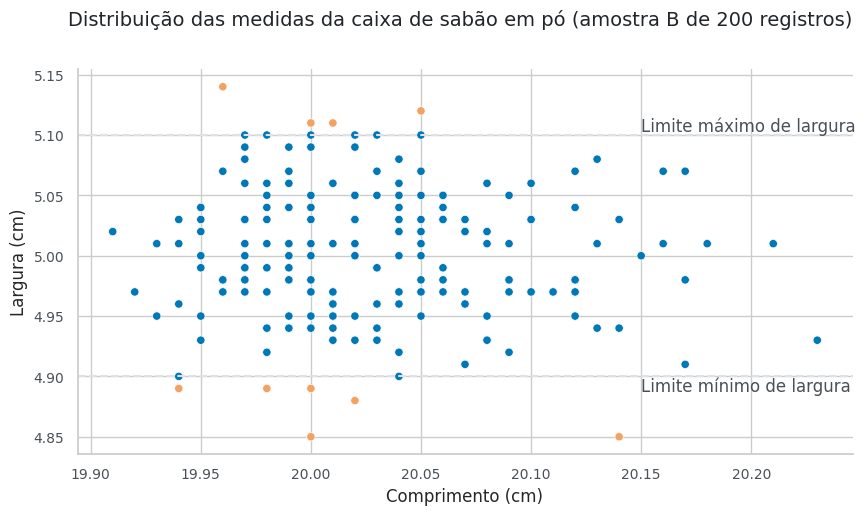

In [85]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style="white")

# Definindo as cores do gráfico e a porcentagem de rejeição
cores = [VERMELHO1, LARANJA1, AZUL2]
pct = 0.02

# Mapeando as cores para a faixa requisitada (2%)
rejeita_comp = [True if (c > 20*(1+pct) or c < 20*(1-pct)) else False for c in df_b["comprimento"]]
rejeita_larg = [True if (a > 5*(1+pct) or a < 5*(1-pct)) else False for a in df_b["largura"]]
map_cores = np.where(rejeita_comp, cores[0], np.where(rejeita_larg, cores[1], cores[2]))

# Gerando o gráfico de dispersão
ax = sns.scatterplot(data = df_b, x="comprimento", y = "largura", color = map_cores)

# Personalizando o gráfico
plt.suptitle('Distribuição das medidas da caixa de sabão em pó (amostra B de 200 registros)', size=14, color=CINZA1, ha = 'right', x = 0.9, y = 1)
ax.set_xlabel('Comprimento (cm)', fontsize = 12)
ax.set_ylabel('Largura (cm)', fontsize = 12)
ax.yaxis.set_tick_params(labelsize=10, labelcolor = CINZA2)
ax.xaxis.set_tick_params(labelsize=10, labelcolor = CINZA2)
sns.despine()

### Desenhando as linhas verticais com os limites mínimos e máximo de largura desejada
ax.text(20.15, 5.1, 'Limite máximo de largura', fontsize=12, color = CINZA2, ha="left", va = "bottom")
plt.axhline(y = 5 * (1 + pct), color = CINZA4, linestyle='--')
ax.text(20.15, 4.9, 'Limite mínimo de largura', fontsize=12, color = CINZA2, ha="left", va = "top")
plt.axhline(y = 5 * (1 - pct), color = CINZA4, linestyle='--')

plt.show()